In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/DS102 - Machine Learning/data/'

In [ ]:
df = pd.read_csv(DATA_PATH + 'hotel_bookings_updated_2024.csv')

In [ ]:
pd.options.display.float_format = '{:,.6f}'.format

# Tổng quan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.shape

(119390, 33)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0,Transient,75.000000,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,...,304.000000,NaN,0,Transient,75.000000,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,...,240.000000,NaN,0,Transient,98.000000,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
119385,City Hotel - Pune,0,23,2024,September,39,29,2,5,2,...,394.000000,NaN,0,Transient,96.140000,0,0,Check-Out,2024-09-29 05:33:06.002060492,Pune
119386,City Hotel - Mumbai,0,102,2024,November,46,16,2,5,3,...,9.000000,NaN,0,Transient,225.430000,0,2,Check-Out,2024-11-16 01:55:18.426320680,Mumbai
119387,City Hotel - Lucknow,0,34,2024,April,16,19,2,5,2,...,9.000000,NaN,0,Transient,157.710000,0,4,Check-Out,2024-04-19 07:50:22.982016768,Lucknow
119388,City Hotel - Ahmedabad,0,109,2024,October,40,5,2,5,2,...,89.000000,NaN,0,Transient,104.400000,0,0,Check-Out,2024-10-05 12:37:40.429352788,Ahmedabad
119389,City Hotel - Bhopal,0,205,2024,December,51,21,2,7,2,...,9.000000,NaN,0,Transient,151.200000,0,2,Check-Out,2024-12-21 07:11:08.111802592,Bhopal


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'city'],
      dtype='object')

In [ ]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


## Thống kê mô tả

### Thống kê mô tả thuộc tính định lượng

In [ ]:
df.select_dtypes(include='number').columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
# Các thuộc tính định lượng:
numerical_features = df.select_dtypes(include='number').columns

In [ ]:
df[numerical_features].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,"119,390.000000","119,390.000000","119,390.000000","119,390.000000","119,390.000000","119,390.000000","119,390.000000","119,390.000000","119,386.000000","119,390.000000","119,390.000000","119,390.000000","119,390.000000","119,390.000000","103,050.000000","6,797.000000","119,390.000000","119,390.000000","119,390.000000","119,390.000000"
mean,0.370416,104.011416,"2,024.000000",26.375835,15.723394,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.000000,15.021596,8.805079,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,"2,024.000000",1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,"2,024.000000",13.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,"2,024.000000",26.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,"2,024.000000",39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,"2,024.000000",52.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,"5,400.000000",8.000000,5.000000


### Thống kê mô tả thuộc tính định tính

In [ ]:
df.select_dtypes(include='object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'city'],
      dtype='object')

In [ ]:
categorical_features = df.select_dtypes(include='object').columns

In [ ]:
df[categorical_features].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,city
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,30,12,5,177,8,5,10,12,3,4,3,75629,15
top,City Hotel - Ahmedabad,October,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2024-01-13 19:56:56.304684686,Bhopal
freq,5405,10349,92310,48590,56477,97870,85994,74053,104641,89613,75166,8,8104


## Phân loại thuộc tính



In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'city'],
      dtype='object')

In [ ]:
# Định lượng rời rạc
discrete_features = ['lead_time',
                     'stays_in_weekend_nights', 'stays_in_week_nights',
                     'adults', 'children', 'babies',
                     'previous_cancellations', 'previous_bookings_not_canceled',
                     'booking_changes',
                     'days_in_waiting_list',
                     'required_car_parking_spaces',
                     'total_of_special_requests'
                     ]

# Định lượng liên tục
continuous_features = ['adr']

In [ ]:
# Định tính không thứ tự
nominal_features = ['hotel',
                    'meal','country', 'market_segment', 'distribution_channel',
                    'reserved_room_type','assigned_room_type',
                    'deposit_type',
                    'agent','company',
                    'customer_type',
                    'reservation_status','city'
                    ]
# Định tính dạng nhị phân
binary_features = ['is_repeated_guest','is_canceled']

# Định tính thời gian
categorical_time_features = [col for col in df.columns if 'arrival_' in col]

# Thời gian
datetime_features = ['reservation_status_date']

In [ ]:
for x in discrete_features + continuous_features + nominal_features + binary_features + datetime_features:
  if x not in df.columns:
    print(f'{x} không có trong tập dữ liệu')

for col in df.columns:
  if col not in discrete_features + continuous_features + nominal_features + binary_features + datetime_features + categorical_time_features:
    print(f'{col} không thuộc nhóm')

In [ ]:
categorical_features = nominal_features + binary_features + categorical_time_features
numerical_features = discrete_features + continuous_features

#### Các giá trị khác nhau của các thuộc tính định tính

In [ ]:
pd.Series({col: df[col].unique() for col in categorical_features})

,0
hotel,"[Resort Hotel - Chandigarh, Resort Hotel - Mum..."
meal,"[BB, FB, HB, SC, Undefined]"
country,"[PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, ..."
market_segment,"[Direct, Corporate, Online TA, Offline TA/TO, ..."
distribution_channel,"[Direct, Corporate, TA/TO, Undefined, GDS]"
reserved_room_type,"[C, A, D, E, G, F, H, L, P, B]"
assigned_room_type,"[C, A, D, E, G, F, I, B, H, P, L, K]"
deposit_type,"[No Deposit, Refundable, Non Refund]"
agent,"[nan, 304.0, 240.0, 303.0, 15.0, 241.0, 8.0, 2..."
company,"[nan, 110.0, 113.0, 270.0, 178.0, 240.0, 154.0..."


## Giá trị khuyết

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
def na_barplot(df):
  na_counts = df.isna().sum()

  ax = na_counts.plot(kind='bar',color='lightpink', edgecolor='black',figsize=(18,6), linewidth=1, zorder=3)
  for i, v in enumerate(na_counts):
    ax.text(i, v, f'{v}', ha='center', va='bottom',fontsize=10)
  plt.grid(True, alpha=0.5,zorder=0)
  plt.title('Số lượng giá trị khuyết')
  plt.show()

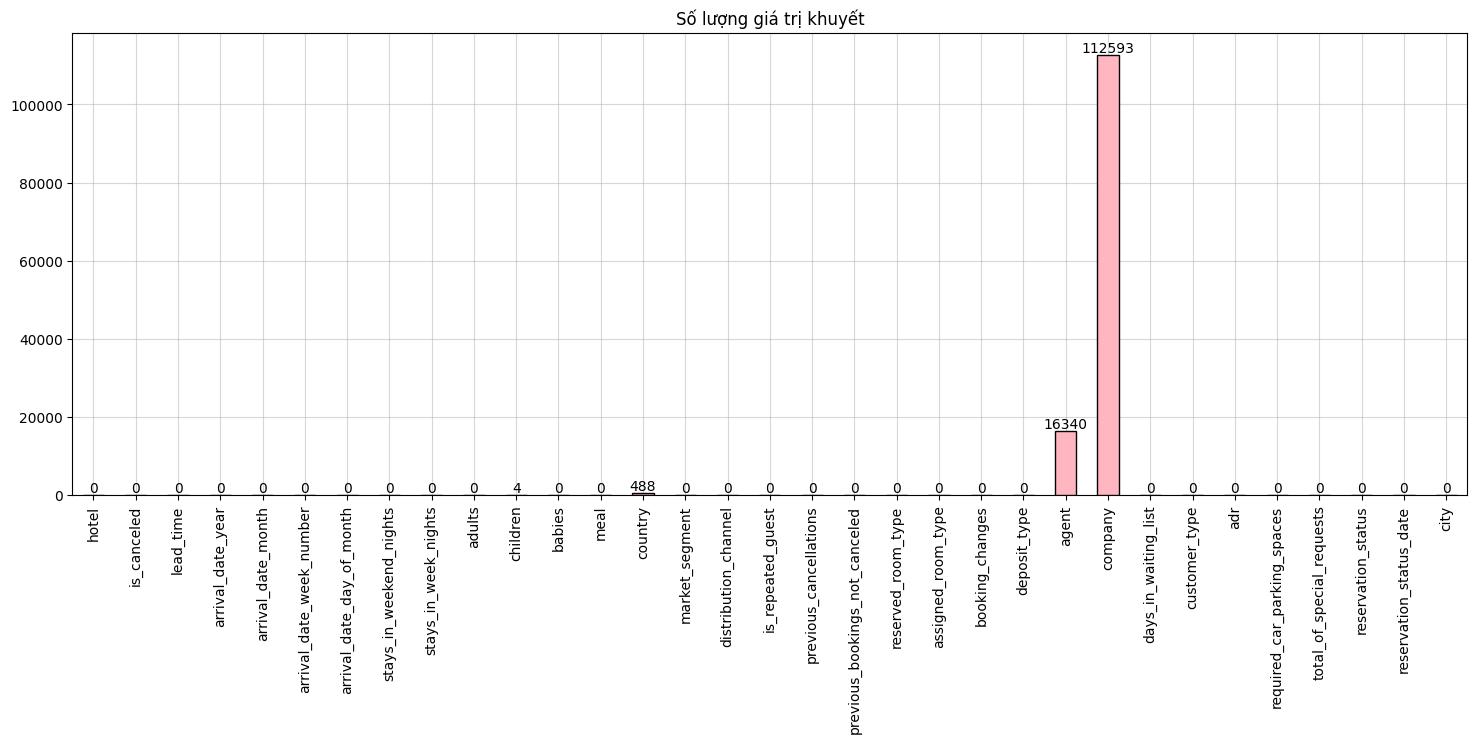

In [ ]:
na_barplot(df)

In [ ]:
# Phần trăm khuyết
print('Phần trăm dữ liệu thiếu:')
for col in df.columns:
  if df[col].isna().sum() > 0:
    print(f'Thuộc tính {col}: {df[col].isna().sum()/len(df)*100:.6f}')

Phần trăm dữ liệu thiếu:
Thuộc tính children: 0.003350
Thuộc tính country: 0.408744
Thuộc tính agent: 13.686238
Thuộc tính company: 94.306893


## Phân bố ban đầu của biến mục tiêu

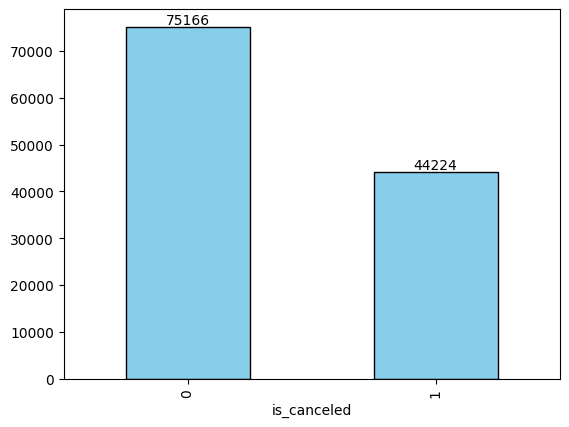

In [ ]:
ax = df['is_canceled'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=10)
plt.show()

# Xử lý dữ liệu

## Loại bỏ giá trị trùng lặp

In [ ]:
df.drop_duplicates(inplace=True)

## Điền giá trị thiếu

1. Với thuộc tính 'company' - mã công ty (chỉ có khi khách đi công tác / hợp đồng doanh nghiệp)
- Tạo biến nhị phân 'has_company'. Dòng nào không thiếu -> 1, thiếu -> 0
- Bỏ cột 'company'

In [ ]:
df['has_company'] = df['company'].notna().astype(int)

In [ ]:
df['has_company'].value_counts()

,count
has_company,
0,112593
1,6797


In [ ]:
df['has_company'].value_counts(normalize=True)

,proportion
has_company,
0,0.943069
1,0.056931


In [ ]:
df.drop('company', axis=1, inplace=True)

In [ ]:
nominal_features.remove('company')
categorical_features.remove('company')

In [ ]:
binary_features.append('has_company')

In [ ]:
categorical_features.append('has_company')

2. Với thuộc tính 'agent' - mã đại lý du lịch, thiếu có thể là do đặt không qua đại lý du lịch
- Xử lý tương tự 'company'

In [ ]:
df['has_agent'] = df['agent'].notna().astype(int)

In [ ]:
df['has_agent'].value_counts()

,count
has_agent,
1,103050
0,16340


In [ ]:
df['has_agent'].value_counts(normalize=True)

,proportion
has_agent,
1,0.863138
0,0.136862


In [ ]:
df.drop('agent', axis=1, inplace=True)
nominal_features.remove('agent')
categorical_features.remove('agent')

In [ ]:
binary_features.append('has_agent')
categorical_features.append('has_agent')

3. Thuộc tính country
- Thiếu có thể do thiếu thông tin của khách hàng
- Lưu ý: country != city (country của khách hàng, city là nơi khách đặt khách sạn)
- Vì vậy điền 'Unknown'

In [ ]:
df['country'] = df['country'].fillna('Unknown')

4. Thuộc tính children
- Thiếu do thiếu thông tin khách hàng
- Thường nếu số trẻ em đi cùng không có thì ngầm hiểu là 0 trẻ em -> điền 0 hoặc mode

In [ ]:
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city,has_company,has_agent
40600,City Hotel - Bangalore,1,2,2024,June,24,16,1,0,2,...,0,Transient-Party,12.000000,0,1,Canceled,2024-06-16 15:52:52.543534160,Bangalore,0,0
40667,City Hotel - Mumbai,1,1,2024,July,28,14,0,2,2,...,0,Transient-Party,12.000000,0,1,Canceled,2024-07-14 03:17:23.101123218,Mumbai,0,1
40679,City Hotel - Hyderabad,1,1,2024,September,39,26,0,2,3,...,0,Transient-Party,18.000000,0,2,Canceled,2024-09-26 12:54:34.311703756,Hyderabad,0,0
41160,City Hotel - Pune,1,8,2024,September,38,21,2,5,2,...,0,Transient-Party,76.500000,0,1,Canceled,2024-09-21 03:33:06.786052316,Pune,0,1


In [ ]:
df['children'].value_counts()

,count
children,
0.000000,110796
1.000000,4861
2.000000,3652
3.000000,76
10.000000,1


In [ ]:
df['children'] = df['children'].fillna(df['children'].mode()[0])

## Chuyển đổi kiểu dữ liệu

In [ ]:
# Chuyển đổi int cho thuộc tính số rời rạc children
df['children'] = df['children'].astype(int)

In [ ]:
# Chuyển đổi datetime cho thuộc tính reservation_status_date
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

## Tách thuộc tính

In [ ]:
df['reservation_status_day'] = df['reservation_status_date'].dt.day
df['reservation_status_month'] = df['reservation_status_date'].dt.month
df['reservation_status_year'] = df['reservation_status_date'].dt.year

In [ ]:
categorical_time_features.append('reservation_status_day')
categorical_time_features.append('reservation_status_month')
categorical_time_features.append('reservation_status_year')

In [ ]:
df['hotel_type'] = df['hotel'].apply(lambda x: x.split(' ')[0])
df['hotel_city'] = df['hotel'].apply(lambda x: x.split(' ')[-1])

In [ ]:
categorical_features.append('hotel_type')
categorical_features.append('hotel_city')

In [ ]:
if df['hotel_city'].equals(df['city']):
  print('Giống nhau hoàn toàn')

Giống nhau hoàn toàn


In [ ]:
df.drop(columns={'hotel','hotel_city'}, axis=1, inplace=True)
nominal_features.remove('hotel')
categorical_features.remove('hotel')
categorical_features.remove('hotel_city')

## Phát hiện ngoại lai

In [ ]:
def plot_boxplot(df, n_rows, n_cols, columns, size=(15, 10)):
  fig, axes = plt.subplots(nrows=n_rows,ncols=n_cols, figsize=size)
  if n_rows*n_cols > 1:
    axes = axes.flatten()
  else:
    axes = [axes]
  for i, col in enumerate(columns):
    ax = axes[i]
    sns.boxplot(df[col],ax=ax,color='pink')
    ax.set_title(col)
  for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_histogram(df, n_rows, n_cols, columns, size=(15,10)):
  fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=size)
  if n_rows*n_cols > 1:
    axes = axes.flatten()
  else:
    axes = [axes]
  for i, col in enumerate(columns):
    ax = axes[i]
    ax.hist(df[col], color='pink', edgecolor='black')
    ax.set_title(col)
  for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_barchart(df, n_rows, n_cols, columns, size=(15,10)):
  fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=size)
  if n_rows*n_cols > 1:
    axes = axes.flatten()
  else:
    axes = [axes]
  for i, col in enumerate(columns):
    ax = axes[i]
    df[col].value_counts().sort_index().plot(kind='bar', ax=ax, color='pink', edgecolor='black')
    ax.bar_label(ax.containers[0],fontsize=7)
    ax.set_title(col)
  for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()

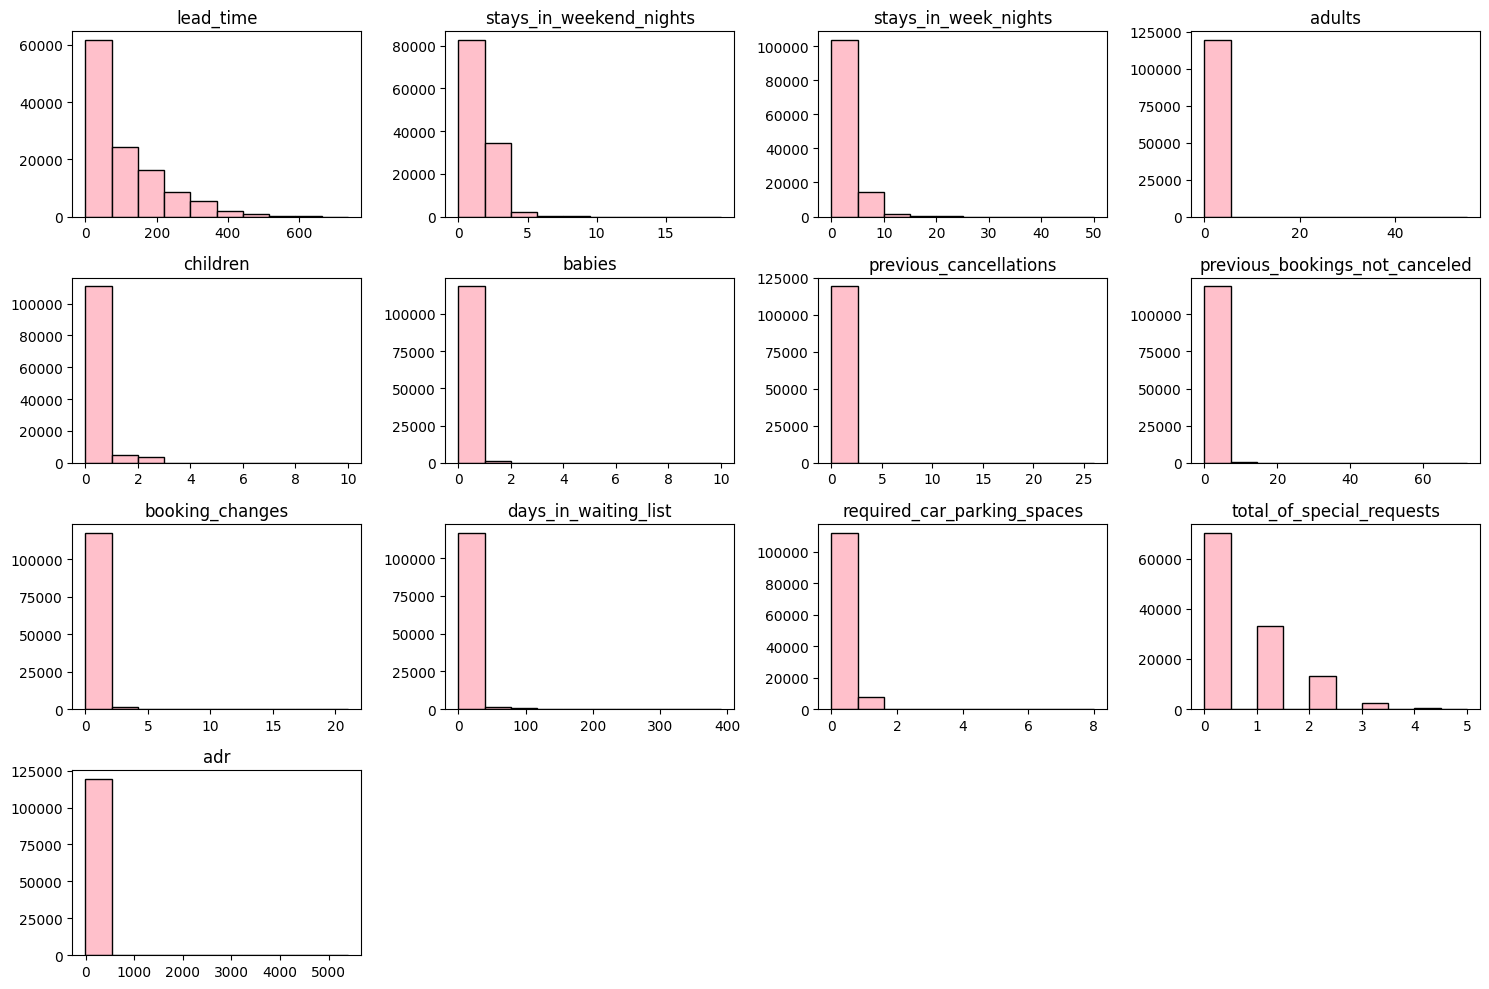

In [ ]:
plot_histogram(df[numerical_features], 4, 4, numerical_features)

Xem sơ bộ phân phối của dữ liệu định lượng (bao gồm cả định lượng liên tục & định lượng rời rạc) cho thấy:
- Phân phối lệch phải khá nhiều
- Nhiều cột lệch rất nặng, đuôi phân phối dài, chứng tỏ có nhiều ngoại lai, nhiễu lớn.
- Cần xem biểu đồ hộp... để xem các giá trị ngoại lai, nhiễu.

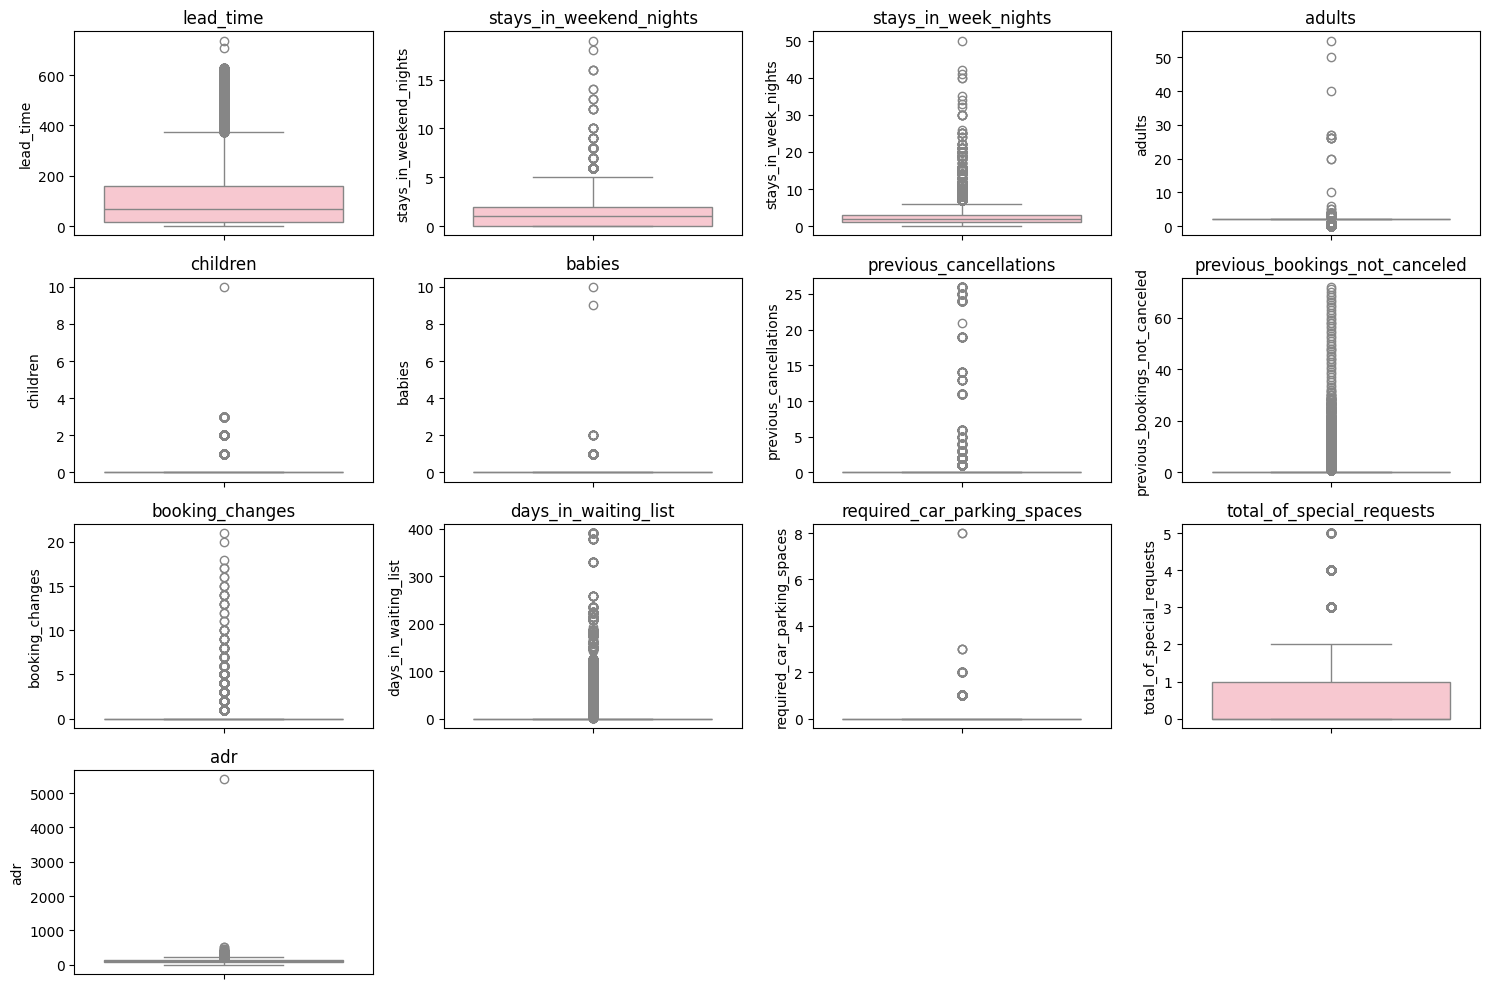

In [ ]:
plot_boxplot(df[numerical_features], 4, 4, numerical_features)

Qua các biểu đồ trên cho thấy:
- Có rất nhiều giá trị ngoại lai, nhiễu lớn hơn so với phần đông dữ liệu làm hộp bị kéo xuống dưới
- Vì phần lớn các cột là định lượng rời rạc nên cần xem thêm bar chart (nếu không có quá nhiều giá trị khác nhau) để xem phân bố dữ liệu.

In [ ]:
for col in discrete_features:
  print(f'{col}: {df[col].nunique()}')

lead_time: 479
stays_in_weekend_nights: 17
stays_in_week_nights: 35
adults: 14
children: 5
babies: 5
previous_cancellations: 15
previous_bookings_not_canceled: 73
booking_changes: 21
days_in_waiting_list: 128
required_car_parking_spaces: 5
total_of_special_requests: 6


In [ ]:
len(discrete_features)

12

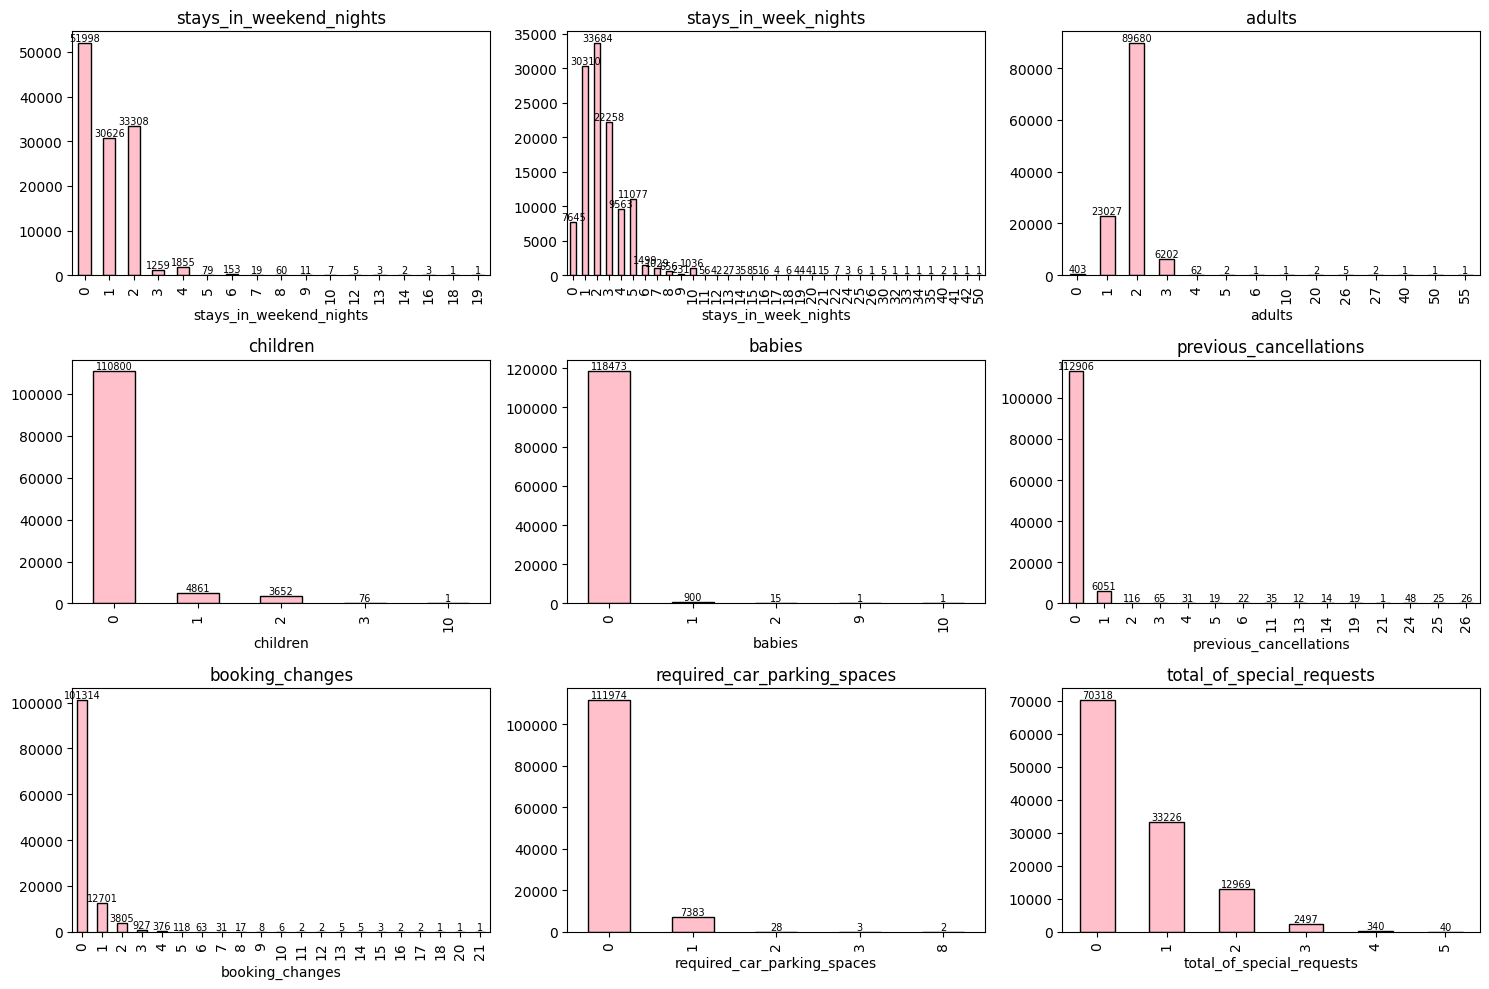

In [ ]:
bar_plot_cols = [col for col in discrete_features if col not in ['lead_time','days_in_waiting_list', 'previous_bookings_not_canceled']]
plot_barchart(df[bar_plot_cols], 3, 3, bar_plot_cols)

## Xử lý ngoại lai

### Thuộc tính định lượng liên tục

In [ ]:
def outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

In [ ]:
def skewness_kurtosis(df, columns):
  for col in columns:
    print(f'{col}: Skewness = {df[col].skew()}, Kurtosis = {df[col].kurtosis()}')

#### Thuộc tính adr

##### Nhiễu

In [ ]:
df['adr'].describe()

,adr
count,"119,390.000000"
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,"5,400.000000"


Từ quan sát trên cho thấy 'adr' có giá trị âm. Điều này có thể là do:
- Hoàn tiền (refund)
- Booking bị hủy sau khi đã ghi nhận doanh thu

Xem các cột liên quan khác để rõ hơn.

In [ ]:
df[df['adr'] < 0][['is_canceled', 'booking_changes']]

,is_canceled,booking_changes
14969,0,2


Quan sát cho thấy không bị hủy booking. Có thể đây là dữ liệu nhiễu, vì vậy nên drop.

In [ ]:
df.drop(df[df['adr'] < 0].index, inplace=True)

Ngoại lai lớn

In [ ]:
df[df['adr'] == df['adr'].max()]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_of_special_requests,reservation_status,reservation_status_date,city,has_company,has_agent,reservation_status_day,reservation_status_month,reservation_status_year,hotel_type
48515,1,35,2024,January,2,8,0,1,2,0,...,0,Canceled,2024-01-08 20:38:36.635535937,Bhopal,0,1,8,1,2024,City


In [ ]:
df.drop(df[df['adr'] == df['adr'].max()].index, inplace=True)

<Axes: ylabel='adr'>

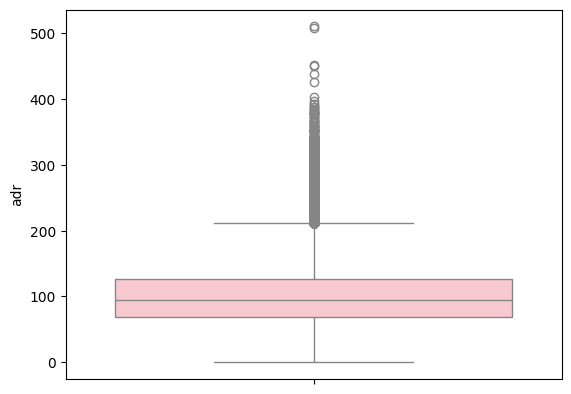

In [ ]:
sns.boxplot(df['adr'], color='pink')

Sau khi bỏ 1 số dữ liệu nhiễu, boxplot ít bị giật xuống dưới hơn nhưng vẫn còn khá nhiều ngoại lai.

##### Ngoại lai

In [ ]:
out_liers_adr = outliers(df, 'adr')

In [ ]:
len(out_liers_adr)/len(df) * 100

3.176198612925922

In [ ]:
out_liers_adr[['stays_in_weekend_nights','stays_in_week_nights', 'adr','total_of_special_requests',
               'booking_changes', 'assigned_room_type', 'days_in_waiting_list']]

,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,booking_changes,assigned_room_type,days_in_waiting_list
140,2,0,225.000000,0,3,G,0
303,2,6,213.750000,0,1,G,0
396,1,5,230.670000,2,1,G,0
412,2,6,216.130000,0,0,H,0
523,0,1,249.000000,0,0,C,0
...,...,...,...,...,...,...,...
119251,2,3,235.000000,0,0,F,0
119289,0,3,236.330000,3,1,F,0
119339,0,5,229.000000,1,1,D,0
119365,3,5,266.750000,1,0,G,0


In [ ]:
out_liers_adr['adr'].describe()

,adr
count,"3,792.000000"
mean,246.590923
std,32.613824
min,211.080000
25%,224.000000
50%,237.000000
75%,260.000000
max,510.000000


In [ ]:
# Lọc bỏ thử các giá trị quá lớn (trên 75% dữ liệu NGOẠI LAI của cột 'adr')
df.drop(out_liers_adr[out_liers_adr['adr'] > out_liers_adr['adr'].quantile(0.75)].index, inplace=True)

<Axes: ylabel='adr'>

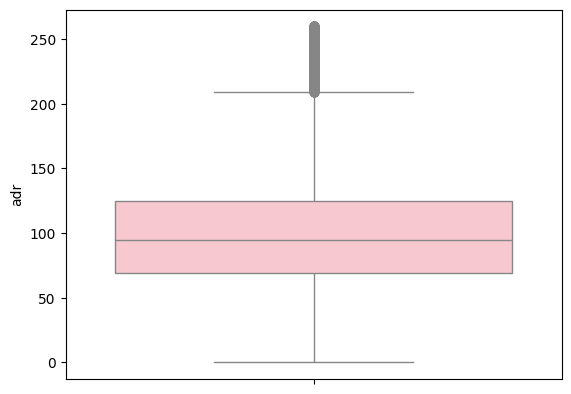

In [ ]:
sns.boxplot(df['adr'], color='pink')

<Axes: xlabel='adr', ylabel='Density'>

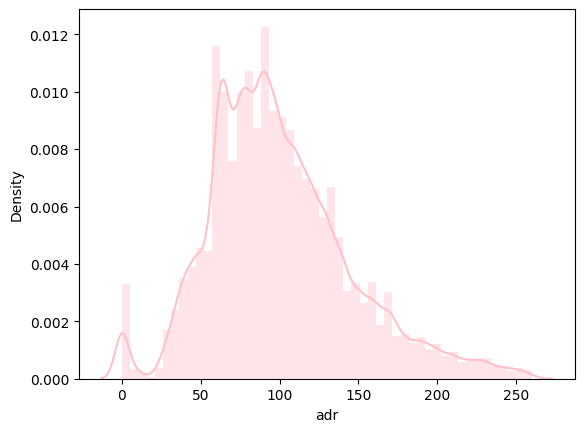

In [ ]:
sns.distplot(df['adr'], color='pink')

Sau khi lọc bỏ 1 số ngoại lai, nhiễu, dữ liệu cho thấy đã đỡ lệch hơn, mức lệch có thể chấp nhận được.

In [ ]:
skewness_kurtosis(df,['adr'])

adr: Skewness = 0.6979341181043918, Kurtosis = 0.7533501056896306


### Thuộc tính định lượng rời rạc

#### Thuộc tính stays_in_weekend_nights và stays_in_week_nights

##### Nhiễu

In [ ]:
df[df['stays_in_week_nights'] + df['stays_in_weekend_nights'] <= 0][['is_canceled', 'reservation_status', 'reservation_status_date', 'lead_time', 'adr']]

,is_canceled,reservation_status,reservation_status_date,lead_time,adr
0,0,Check-Out,2024-07-27 22:16:40.916332324,342,0.000000
1,0,Check-Out,2024-04-28 21:56:21.507509066,737,0.000000
167,0,Check-Out,2024-10-23 20:25:45.187580096,111,0.000000
168,0,Check-Out,2024-10-05 06:49:52.979252696,0,0.000000
196,0,Check-Out,2024-08-04 08:08:08.245985812,8,0.000000
...,...,...,...,...,...
115483,0,Check-Out,2024-09-02 15:25:17.476484432,15,0.000000
117701,0,Check-Out,2024-01-22 22:14:07.495162871,0,0.000000
118029,0,Check-Out,2024-10-25 08:40:32.786940168,0,0.000000
118631,0,Check-Out,2024-10-04 07:51:55.613666248,78,0.000000


Qua kiểm tra nhiễu khi đặt phòng đã check-out (tức là có checkin), không bị hủy nhưng adr lại = 0 và số đêm ở = 0 => vô lý về logic. Dù cho có checkin ban ngày và checkout trong cùng ngày, trước buổi đêm thì trong quản lý khách sạn vẫn tính là 1 ngày mà ở đây total lại = 0 thì là dữ liệu sai, nhiễu.

In [ ]:
df.drop(df[df['stays_in_week_nights'] + df['stays_in_weekend_nights'] <= 0].index, inplace=True)

##### Ngoại lai

In [ ]:
out_liers_weekend_nights = outliers(df, 'stays_in_weekend_nights')
out_liers_week_nights = outliers(df, 'stays_in_week_nights')

In [ ]:
out_liers_weekend_nights[['stays_in_weekend_nights', 'stays_in_week_nights']].describe()

,stays_in_weekend_nights,stays_in_week_nights
count,265.000000,265.000000
mean,7.215094,18.290566
std,2.084157,5.286714
min,6.000000,10.000000
25%,6.000000,15.000000
50%,6.000000,18.000000
75%,8.000000,20.000000
max,19.000000,50.000000


In [ ]:
out_liers_week_nights[['stays_in_weekend_nights', 'stays_in_week_nights']].describe()

,stays_in_weekend_nights,stays_in_week_nights
count,"3,321.000000","3,321.000000"
mean,3.525143,9.382114
std,1.512214,3.351142
min,2.000000,7.000000
25%,2.000000,7.000000
50%,4.000000,8.000000
75%,4.000000,10.000000
max,19.000000,50.000000


Xem và xóa các ngoại lai trên phân vị 3 của outliers của cột stays_in_weekend_nights

In [ ]:
df.drop(out_liers_weekend_nights[out_liers_weekend_nights['stays_in_weekend_nights'] > out_liers_weekend_nights['stays_in_weekend_nights'].quantile(0.75)].index, inplace=True)

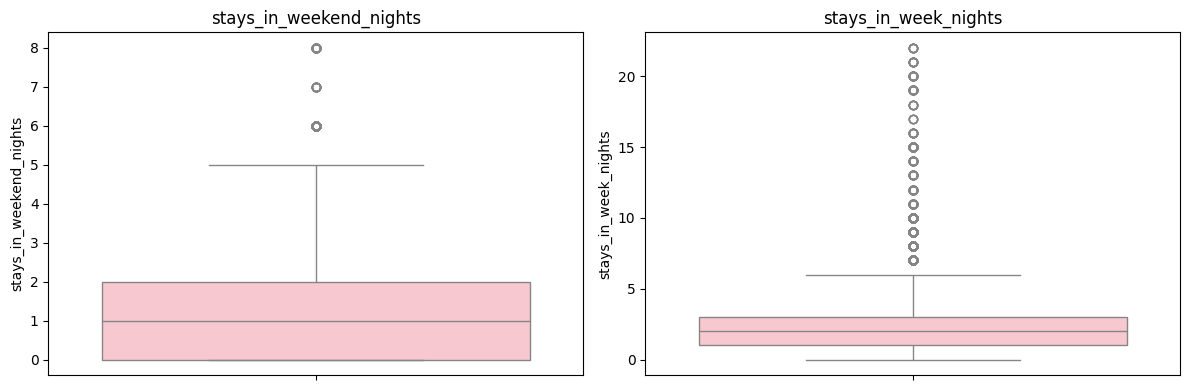

In [ ]:
plot_boxplot(df[['stays_in_weekend_nights', 'stays_in_week_nights']], 1, 2, ['stays_in_weekend_nights', 'stays_in_week_nights'], size=(12,4)  )

stays_in_week_nights vẫn còn nhiều ngoại lai

Loại bỏ các ngoại lai > 75% dữ liệu (của cột stays_in_week_nights) của ngoại lai

In [ ]:
out_liers_week_nights = outliers(df, 'stays_in_week_nights')
df.drop(out_liers_week_nights[out_liers_week_nights['stays_in_week_nights'] > out_liers_week_nights['stays_in_week_nights'].quantile(0.75)].index, inplace=True)

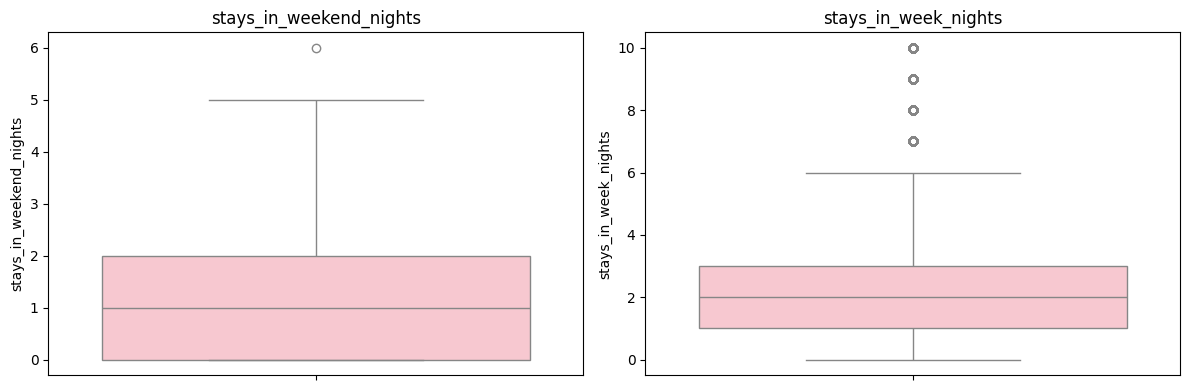

In [ ]:
plot_boxplot(df[['stays_in_weekend_nights', 'stays_in_week_nights']], 1, 2, ['stays_in_weekend_nights', 'stays_in_week_nights'], size=(12,4)  )

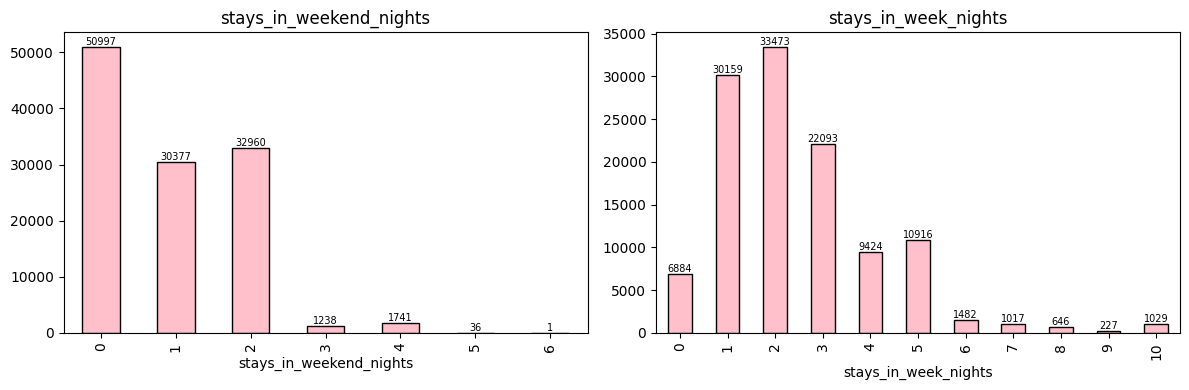

In [ ]:
plot_barchart(df[['stays_in_weekend_nights', 'stays_in_week_nights']], 1, 2, ['stays_in_weekend_nights', 'stays_in_week_nights'], size=(12,4)  )

In [ ]:
skewness_kurtosis(df,[ 'stays_in_weekend_nights', 'stays_in_week_nights'])

stays_in_weekend_nights: Skewness = 0.6971702336190889, Kurtosis = -0.047035799867495065
stays_in_week_nights: Skewness = 1.363173672602342, Kurtosis = 2.9971105753616465


Sau khi loại bỏ nhiễu, vẫn còn 1 số giá trị lớn nhưng độ lệch của dữ liệu đã được giảm đáng kể, ở mức có thể chấp nhận được

#### Thuộc tính adults, children, babies

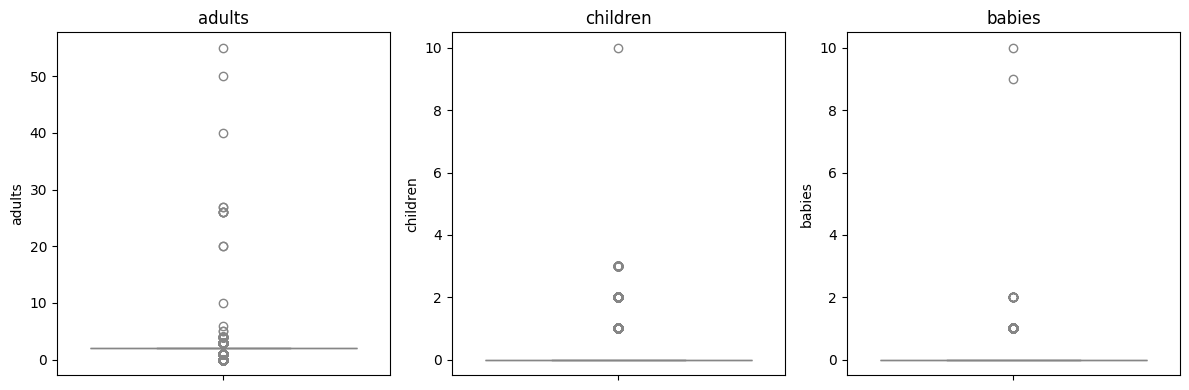

In [ ]:
plot_boxplot(df[['adults', 'children', 'babies']], 1, 3, ['adults', 'children', 'babies'], size=(12,4))

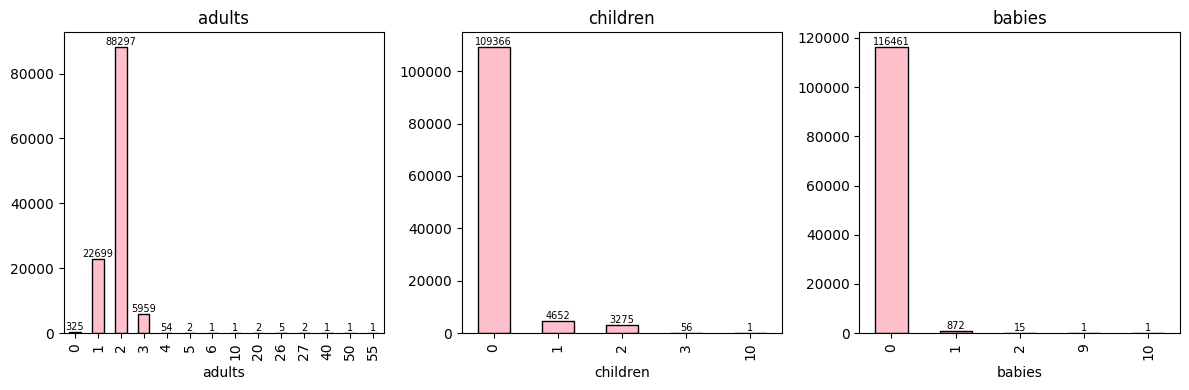

In [ ]:
plot_barchart(df[['adults', 'children', 'babies']], 1, 3, ['adults', 'children', 'babies'], size=(12,4))

##### Nhiễu

In [ ]:
df[(df['adults'] <= 0) | (df['children'] > 3) | (df['babies'] >= 2)][['adults','children', 'babies','is_canceled']]

,adults,children,babies,is_canceled
264,2,0,2,0
328,2,10,0,1
2224,0,0,0,0
3181,0,0,0,0
3684,0,0,0,0
...,...,...,...,...
117204,0,2,0,0
117274,0,2,0,0
117303,0,2,0,0
117453,0,2,0,0


In [ ]:
df[(df['adults'] + df['children'] + df['babies'] == 0) & (df['is_canceled'] == 0)]['reservation_status'].value_counts()

,count
reservation_status,
Check-Out,90


In [ ]:
df[(df['adults'] == 0) & ((df['children'] > 0) | (df['babies'] > 0))]['customer_type'].value_counts()

,count
customer_type,
Transient,139
Transient-Party,82
Group,1
Contract,1


In [ ]:
df[df['adults'] > 10]['customer_type'].value_counts() # các giá trị adults > 10 đều là đi theo đoàn (Group)

,count
customer_type,
Group,12


In [ ]:
df[(df['adults'] == 0) & (df['is_canceled'] == 0)][['adults', 'children', 'babies','customer_type']]

,adults,children,babies,customer_type
2224,0,0,0,Transient-Party
3181,0,0,0,Transient-Party
3684,0,0,0,Transient-Party
3708,0,0,0,Transient-Party
31765,0,0,0,Transient
...,...,...,...,...
117204,0,2,0,Transient
117274,0,2,0,Transient
117303,0,2,0,Transient
117453,0,2,0,Transient


Các giá trị nhiễu:
- adults + children + babies = 0 VÀ is_canceled = 0 (tổng số khách đã đi, đã checkout không thể nào = 0)
- Sau khi loại điều kiện trên thấy adults + children + babies = 0 thì is_canceled đương nhiên = 1 -> data leakage -> loại.
- adults = 0, children hoặc babies > 0 chưa phải nhiễu, vì về mặt dữ liệu booking:
**adults** = số người lớn trả tiền / người chịu trách nhiệm
(Booking được tạo qua đại lý: trẻ em đi theo đoàn / tour, trẻ em được gộp vào booking khác). Tuy nhiên, với những mẫu khi xem market_segment và customer_type, không thấy có nhóm Groups, có thể các mẫu này là nhiễu, nên bỏ

In [ ]:
df.drop(df[(df['adults'] + df['children'] + df['babies'] == 0) & (df['is_canceled'] == 0)].index, inplace=True)
df.drop(df[(df['adults'] + df['children'] + df['babies'] == 0)].index, inplace=True)
df.drop(df[(df['adults'] == 0) & ((df['children'] > 0) | (df['babies'] > 0)) & (df['customer_type'] != 'Group')].index, inplace=True)

##### Ngoại lai

In [ ]:
df[(df['adults'] > 10)]['customer_type'].value_counts()

,count
customer_type,
Group,12


In [ ]:
df[df['children'] > 3][['children','adults','babies','customer_type','market_segment']]

,children,adults,babies,customer_type,market_segment
328,10,2,0,Contract,Offline TA/TO


In [ ]:
df[df['babies'] > 2][['babies','adults','customer_type']]

,babies,adults,customer_type
46619,10,2,Transient
78656,9,1,Transient-Party


Dữ liệu ngoại lai trên cho thấy:
- Khách trên 10 người trưởng thành thì đi theo đoàn (customer_type là group) -> ngoại lai hợp lệ, nên giữ.
- Lượng trẻ em là 10, có 2 người trưởng thành đi cùng -> khá hiếm trong thực tế, nên bỏ.
- Tương tự với trẻ sơ sinh (nhiều trẻ sơ sinh, nhưng lại ít người trưởng thành đi cùng, customer_type cũng  không phải là group - đi theo đoàn mà lại là đi lẻ hoặc lẻ nhóm nhỏ) -> hiếm trong thực tế nên drop.


In [ ]:
df.drop(df[df['children'] > 3].index, inplace=True)
df.drop(df[df['babies'] > 2].index, inplace=True)

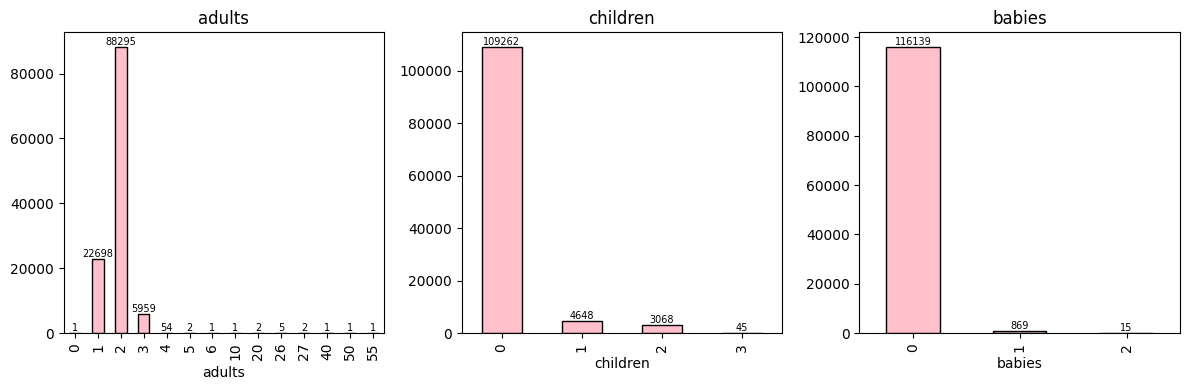

In [ ]:
plot_barchart(df[['adults', 'children', 'babies']], 1, 3, ['adults', 'children', 'babies'], size=(12,4))

In [ ]:
skewness_kurtosis(df, ['adults','children','babies'])

adults: Skewness = 19.676341189244354, Kurtosis = 1468.3813231578063
children: Skewness = 4.230074147352653, Kurtosis = 17.64692410405297
babies: Skewness = 11.822720737871846, Kurtosis = 145.5030856577113


Kết quả trực quan và độ lệch, độ nhọn cho thấy dữ liệu vẫn lệch phải rất nặng, nhưng nhiều mẫu lại đúng với thực tế. Hướng xử lý sau này là biến đổi dữ liệu bằng RobustScaler hoặc log-transform.

#### Thuộc tính previous_cancellations, previous_bookings_not_canceled, booking_changes và days_in_waiting_list

##### Ngoại lai

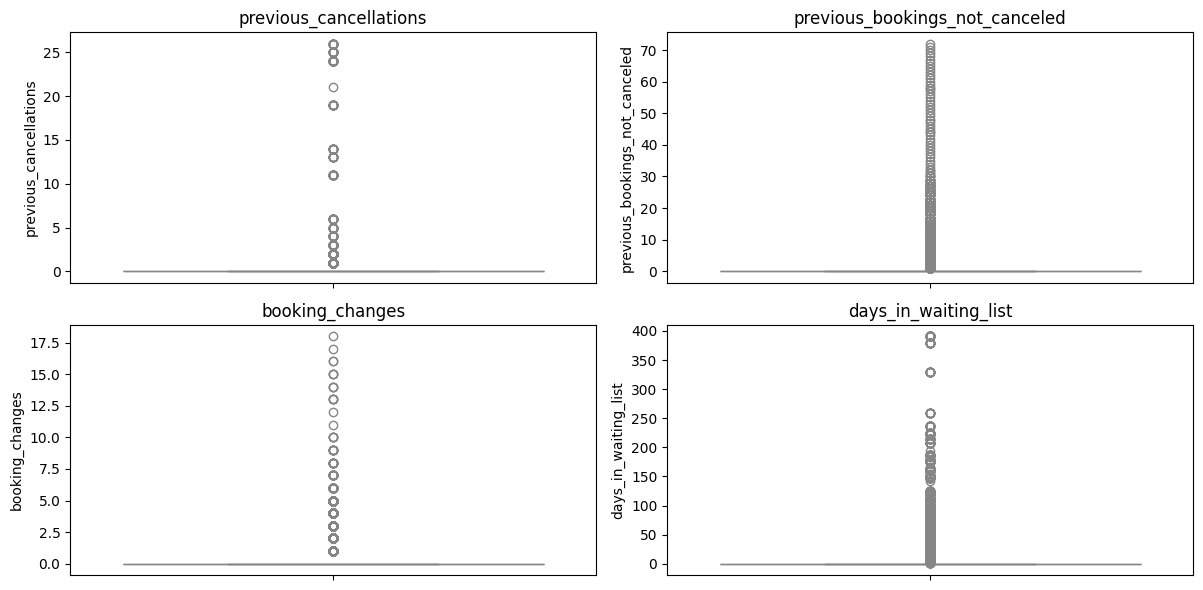

In [ ]:
cols_to_analysis = ['previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list']
plot_boxplot(df[cols_to_analysis], 2, 2, cols_to_analysis, size=(12,6))

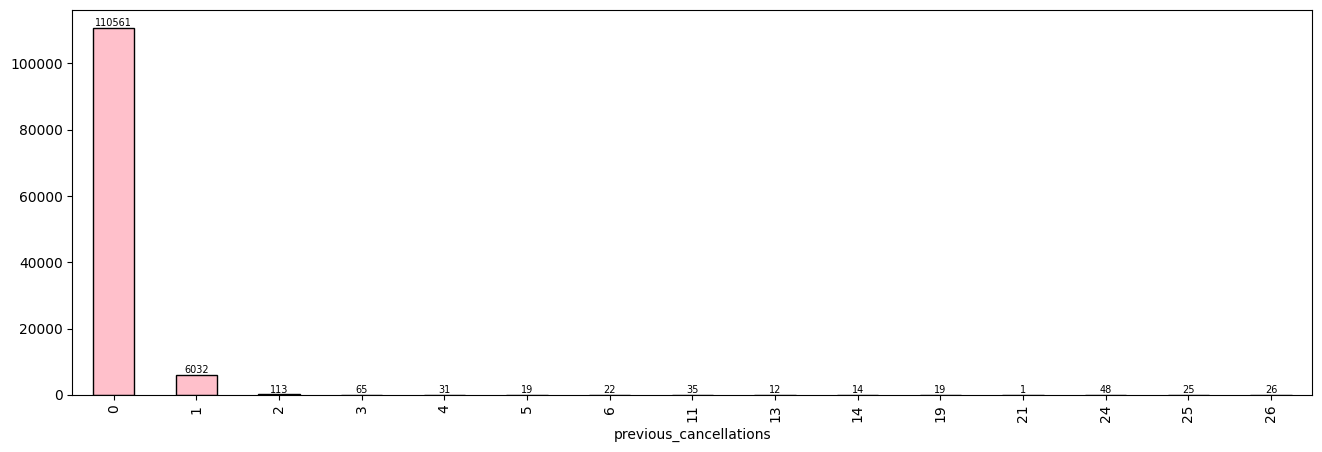

In [ ]:
ax = df['previous_cancellations'].value_counts().sort_index().plot(kind='bar', color='pink', edgecolor='black',figsize=(16,5))
ax.bar_label(ax.containers[0],fontsize = 7);

In [ ]:
df[df['previous_cancellations'] > 5]['is_canceled'].value_counts(normalize=True)  # previous_cancellations cao -> càng dễ hủy

,proportion
is_canceled,
1,0.797030
0,0.202970


Thuộc tính **previous_cancellations** có phân phối lệch phải với một số giá trị lớn. Tuy nhiên, các giá trị này phản ánh hành vi thực tế của khách hàng có xu hướng hủy booking thường xuyên. Do đó, các ngoại lai này được giữ lại và được xử lý bằng cách phân nhóm để giảm ảnh hưởng của phân phối lệch.

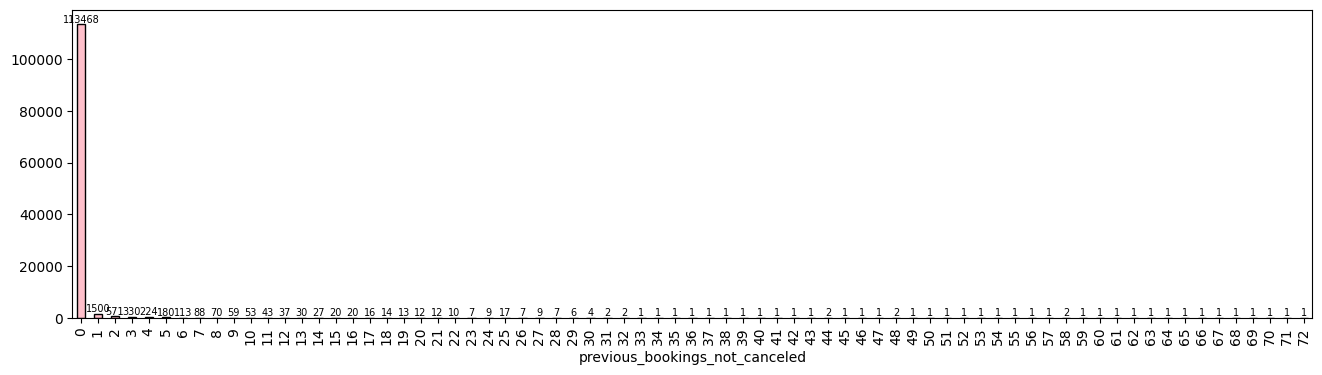

In [ ]:
plt.figure(figsize=(16,4))
ax = df['previous_bookings_not_canceled'].value_counts().sort_index().plot(kind='bar', color='pink', edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7)
plt.show()

In [ ]:
df[df['previous_bookings_not_canceled'] >= 2]['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.941606
1,0.058394


In [ ]:
df[df['previous_bookings_not_canceled'] < 2]['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.622408
1,0.377592


Kết quả trực quan cho thấy phần lớn là khách chưa đặt phòng lần nào trước đây, nhưng tỉ lệ hủy phòng khách đã từng đặt phòng thấp hơn so với khách chưa đặt phòng lần nào, có thể là biến tốt cho mô hình, vì vậy không drop dựa trên IQR thông thường.
Tương tự như biến previous_cancellations, chia nhóm để xử lý.


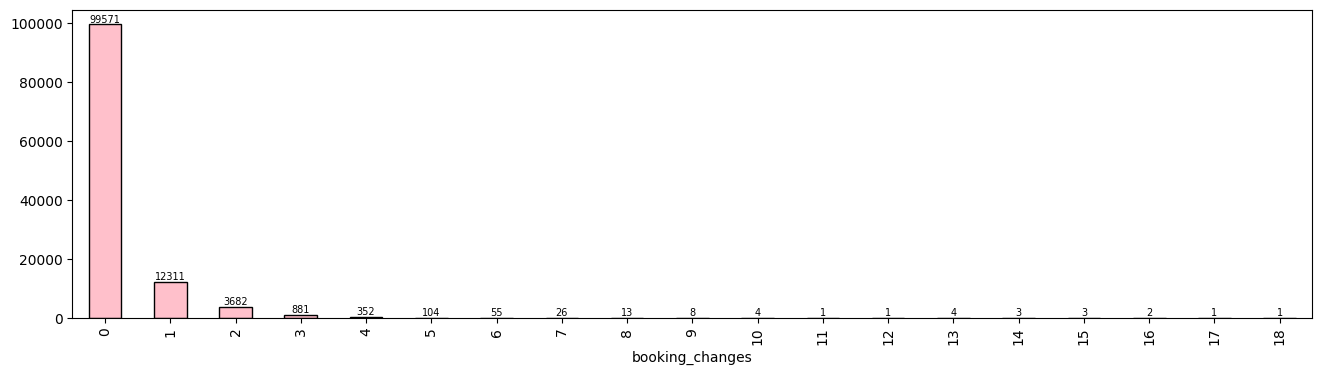

In [ ]:
plt.figure(figsize=(16,4))
ax = df['booking_changes'].value_counts().sort_index().plot(kind='bar', color='pink', edgecolor='black')
ax.bar_label(ax.containers[0],fontsize=7)
plt.show()

In [ ]:
df[df['booking_changes'] >= 3]['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.827964
1,0.172036


In [ ]:
df[df['booking_changes'] < 3]['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.625489
1,0.374511


Từ quan sát cho thấy dù nhiều lần đổi thông tin book phòng nhưng lại không quá ảnh hưởng đến việc hủy phòng hay không, thâm chí tỉ lệ hủy thấp hơn nhóm không đổi thông tin gì. Đây là outliers hợp lệ vì vậy không drop mà chia giỏ như đối với 2 biến trên


In [ ]:
df['days_in_waiting_list'].describe()

,days_in_waiting_list
count,"117,023.000000"
mean,2.359186
std,17.746223
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,391.000000


In [ ]:
df[df['days_in_waiting_list'] > df['days_in_waiting_list'].quantile(0.75)]['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
1,0.639967
0,0.360033


In [ ]:
df[df['days_in_waiting_list'] <= df['days_in_waiting_list'].quantile(0.75)]['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.636721
1,0.363279


Từ quan sát trên cho thấy, khi days_in_waiting_list lớn thì tỉ lệ hủy đặt phòng cũng cao. Do đó, những ngoại lai này là hợp lệ và có thông tin hữu ích cho mô hình. Hướng xử lý là chia giỏ (tương tự 3 biến trên).

<Axes: xlabel='days_in_waiting_list'>

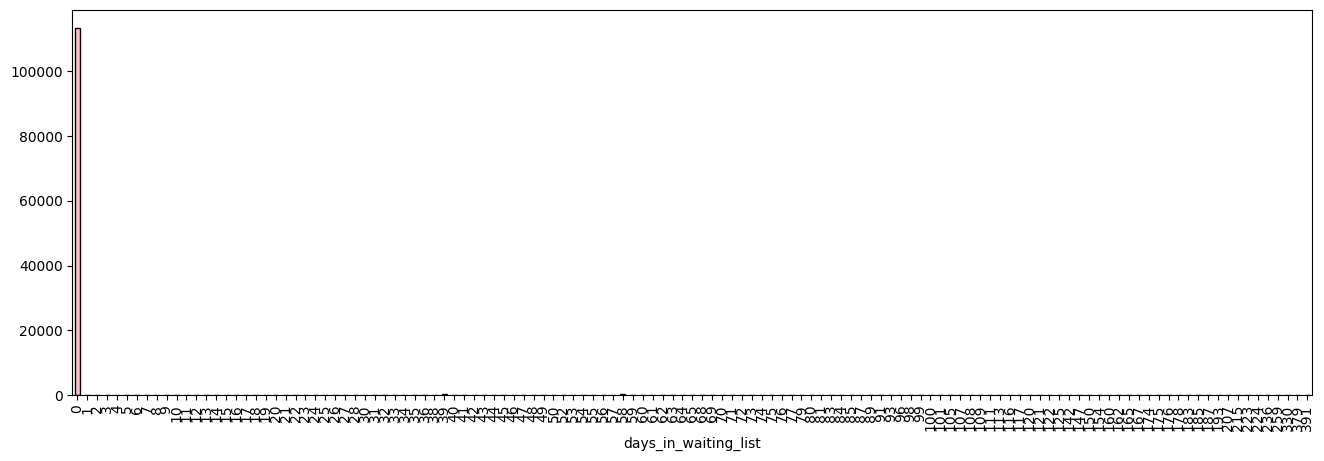

In [ ]:
df['days_in_waiting_list'].value_counts().sort_index().plot(kind='bar', color='pink', edgecolor='black',figsize=(16,5))

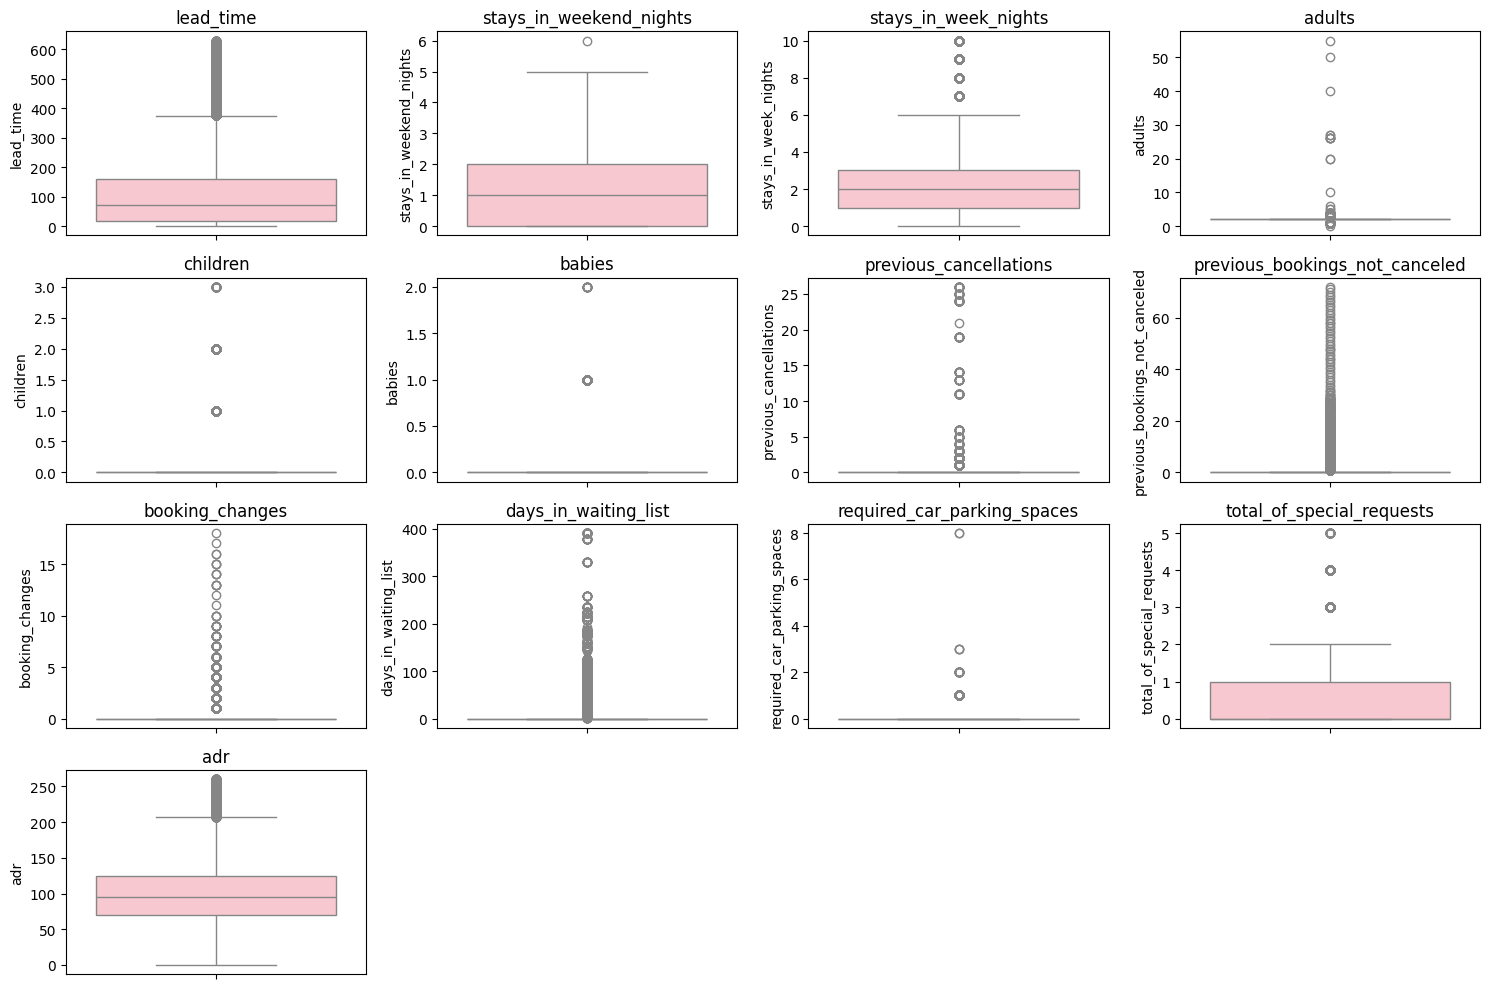

In [ ]:
plot_boxplot(df[numerical_features], 4, 4, numerical_features)

#### Thuộc tính required_car_parking_spaces và total_of_special_requests

In [ ]:
df['required_car_parking_spaces'].describe()

,required_car_parking_spaces
count,"117,023.000000"
mean,0.061894
std,0.244099
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


In [ ]:
df[df['required_car_parking_spaces'] > df['required_car_parking_spaces'].quantile(0.75)]['required_car_parking_spaces'].value_counts()

,count
required_car_parking_spaces,
1,7170
2,24
3,3
8,2


In [ ]:
df[df['required_car_parking_spaces'] >= 2][['adults','children','babies', 'required_car_parking_spaces']]

,adults,children,babies,required_car_parking_spaces
140,3,0,0,2
2568,2,0,0,2
6150,2,0,0,2
8904,2,0,0,2
16016,2,0,0,2
16656,1,0,0,2
22031,2,0,0,2
22607,2,0,0,2
22730,2,0,0,2
23745,2,0,0,2


In [ ]:
df[df['adults']+df['children']+df['babies'] < df['required_car_parking_spaces']]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_of_special_requests,reservation_status,reservation_status_date,city,has_company,has_agent,reservation_status_day,reservation_status_month,reservation_status_year,hotel_type
16656,0,199,2024,May,19,7,0,3,1,0,...,2,Check-Out,2024-05-07 18:43:21.827639062,Chandigarh,0,1,7,5,2024,Resort
29045,0,26,2024,March,10,8,0,5,2,0,...,1,Check-Out,2024-03-08 09:09:14.432987963,Goa,0,0,8,3,2024,Resort
29046,0,138,2024,February,7,14,2,2,2,0,...,0,Check-Out,2024-02-14 18:42:10.906532427,Ahmedabad,0,0,14,2,2024,Resort
38117,0,205,2024,December,49,7,3,10,2,0,...,0,Check-Out,2024-12-07 20:55:43.544212616,Pune,0,1,7,12,2024,Resort
102762,0,13,2024,October,42,20,1,0,1,0,...,0,Check-Out,2024-10-20 21:59:26.047123268,Hyderabad,0,1,20,10,2024,City
110812,0,30,2024,June,23,7,2,1,2,0,...,2,Check-Out,2024-06-07 02:00:06.452855790,Goa,0,1,7,6,2024,City


Từ quan sát cho thấy:
- Đi số lượng người ít hơn số lượng chỗ đậu xe yêu cầu (vd: đi 1 người nhưng đặt >=2 chỗ đậu xe) -> vô lý -> drop

In [ ]:
df.drop(df[df['adults']+df['children']+df['babies'] < df['required_car_parking_spaces']].index,inplace=True)

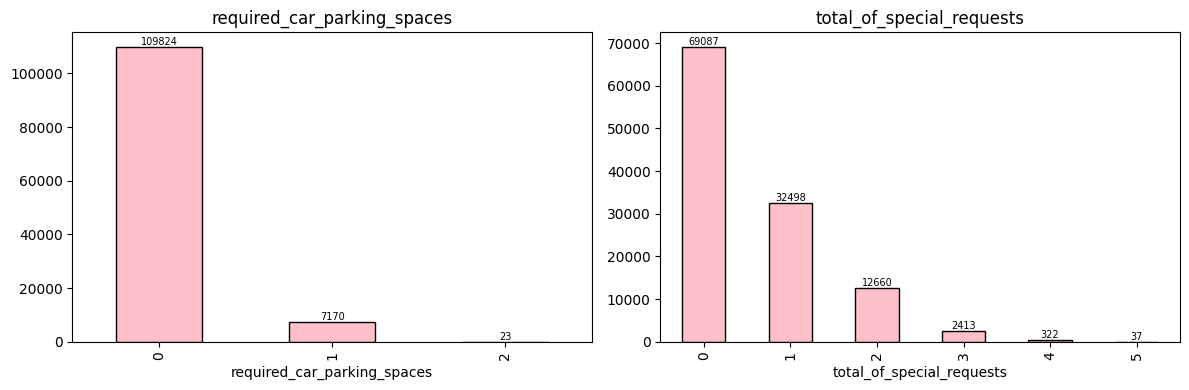

In [ ]:
plot_barchart(df[['required_car_parking_spaces', 'total_of_special_requests']], 1, 2, ['required_car_parking_spaces', 'total_of_special_requests'], size=(12,4))

### Thuộc tính định tính

In [ ]:
def plot_piechart(df, n_rows, n_cols, columns):
  fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 6))
  if n_rows*n_cols > 1:
    axes = axes.flatten()
  else:
    axes = [axes]
  for i, col in enumerate(columns):
    ax = axes[i]
    counts = df[col].value_counts()
    counts.plot(kind='pie',colormap='Set3',autopct='%1.1f%%',ax=ax)
    ax.set_title(col)
    ax.legend(labels=counts.index, loc='upper right', fontsize=9)
  for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()

In [ ]:
pd.Series({col: df[col].nunique() for col in categorical_features})

,0
meal,5
country,176
market_segment,8
distribution_channel,5
reserved_room_type,9
assigned_room_type,11
deposit_type,3
customer_type,4
reservation_status,3
city,15


In [ ]:
categorical_nunique = [col for col in categorical_features if df[col].nunique() <= 15]
len(categorical_nunique)

16

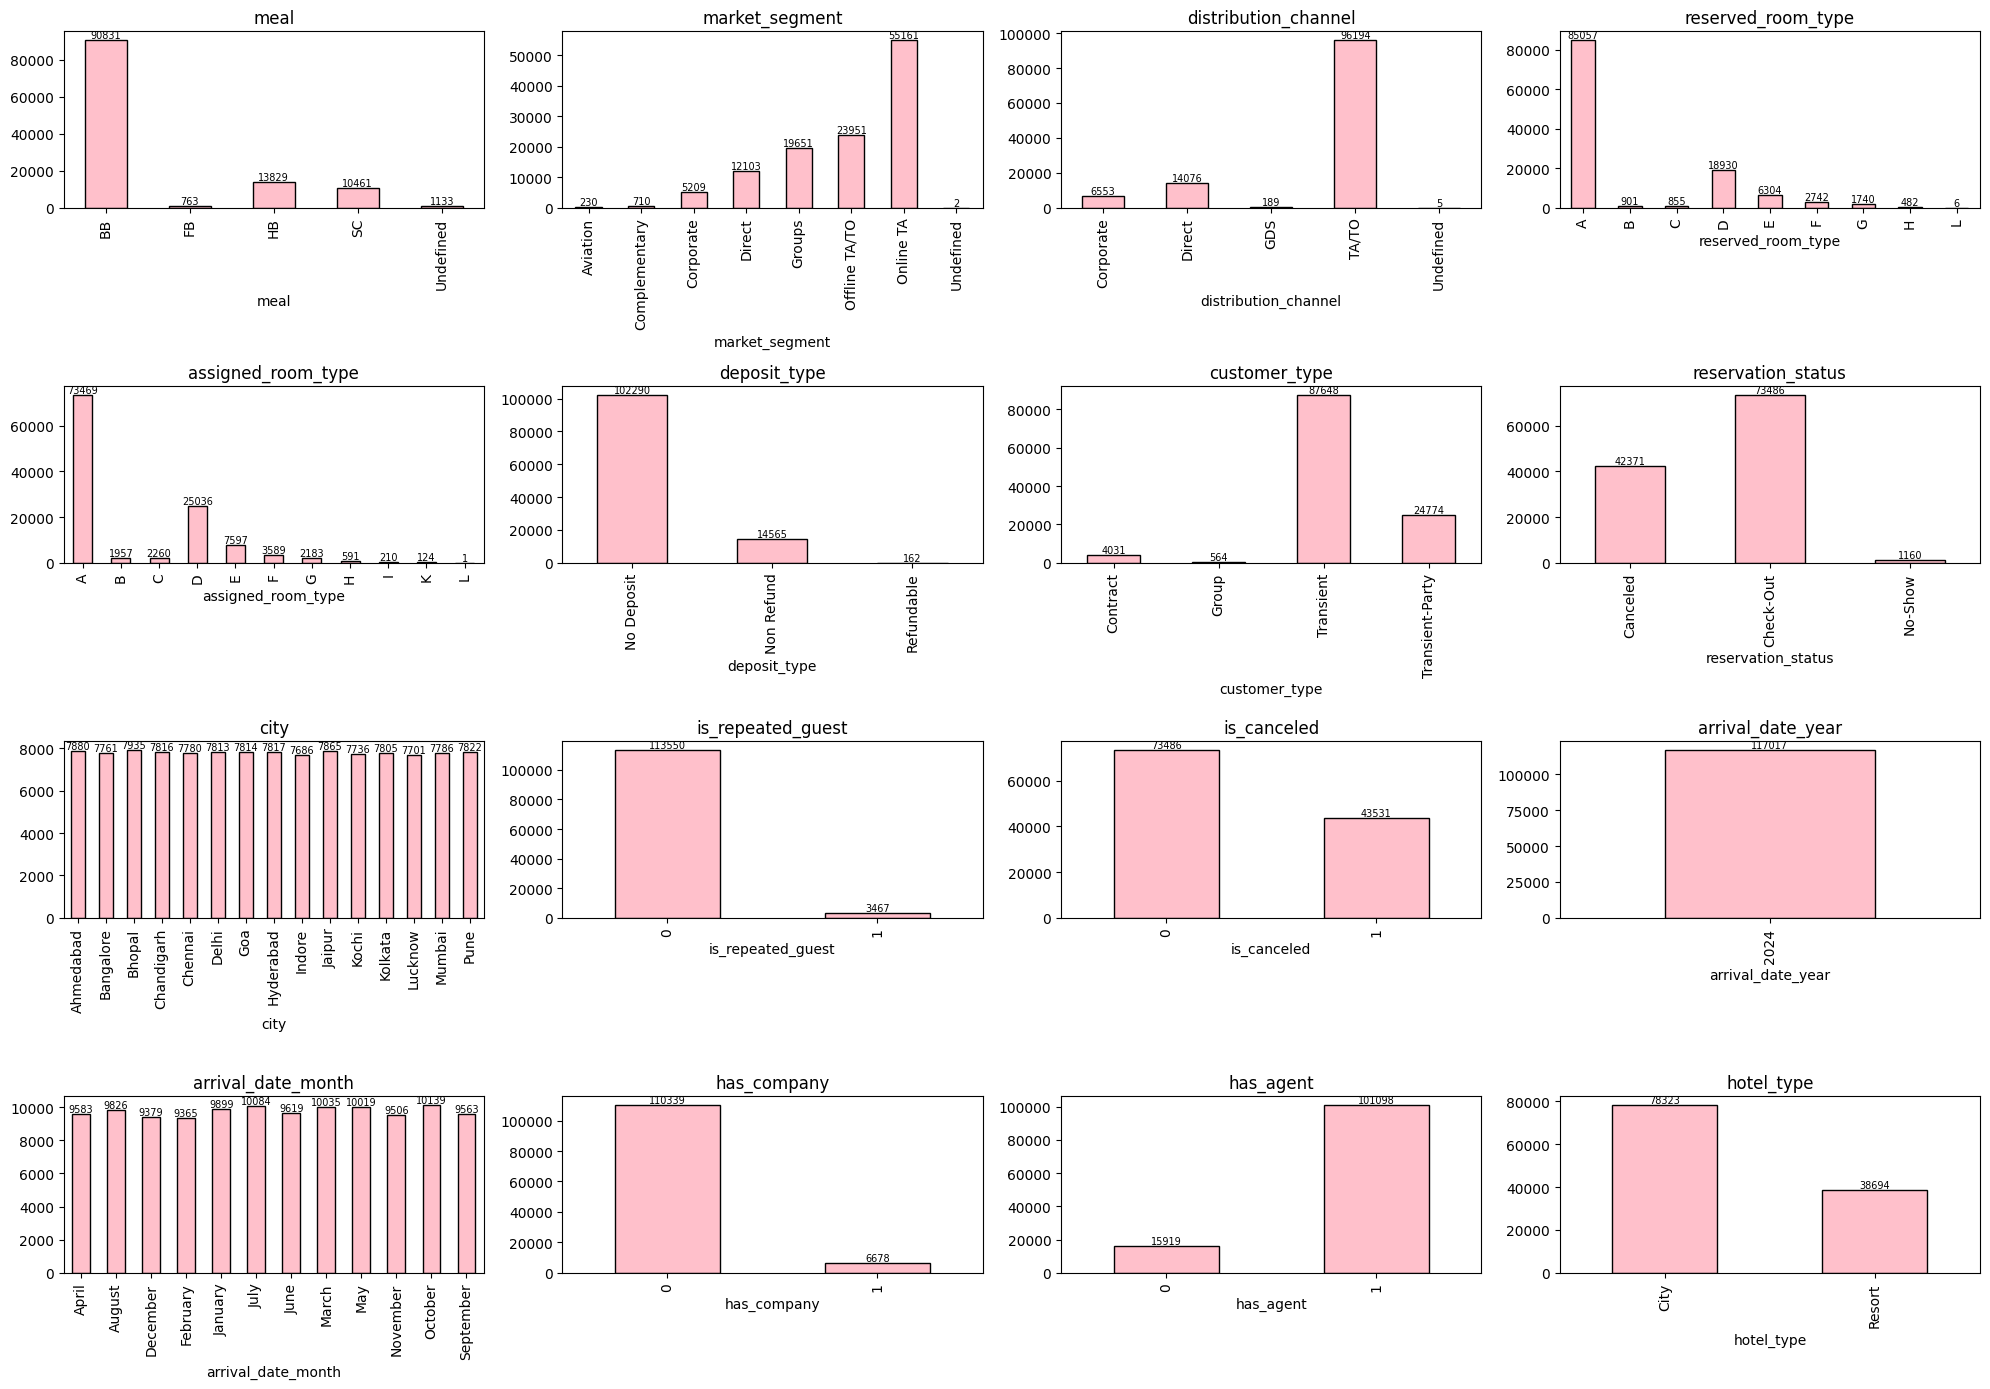

In [ ]:
plot_barchart(df[categorical_nunique], 4, 4, categorical_nunique, size=(20,14))

  ## Tạo và chuyển đổi đặc trưng

Dựa trên các quyết định từ quá trình thăm dò dữ liệu trên

In [ ]:
def binning(df, column, bins, labels):
  df[column + '_group'] = pd.cut(df[column], bins=bins, labels=labels)
  return df

1. Tạo nhóm cho previous_cancellations

In [ ]:
df = binning(df, 'previous_cancellations', [-1, 0, 5, df['previous_cancellations'].max()], ['0', '1-5', '>5'])

2. Tạo nhóm cho previous_bookings_not_canceled

In [ ]:
df = binning(df, 'previous_bookings_not_canceled', [-1, 0, 5, df['previous_bookings_not_canceled'].max()], ['0', '1-5', '>5'])

3. Tạo nhóm cho booking_changes

In [ ]:
df = binning(df, 'booking_changes', [-1, 0, 2, df['booking_changes'].max()], ['0', '1-2', '>2'])

4. Tạo nhóm cho days_in_waiting_list

In [ ]:
df = binning(df, 'days_in_waiting_list', [-1, 0, 7, 30, 90, df['days_in_waiting_list'].max()],['no_wait', 'short', 'medium', 'long', 'very_long'])

5. Tạo biến total_guest từ adults, children, babies

In [ ]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

6. Tạo biến total_stays từ stays_in_week_nights và stays_in_weekend_nights

In [ ]:
df['total_stays'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [ ]:
for col in df.columns:
  if '_group' in col:
    if col not in categorical_features:
      categorical_features.append(col)

In [ ]:
numerical_features.append('total_guests')
numerical_features.append('total_stays')

In [ ]:
categorical_features.append('reservation_status_day')
categorical_features.append('reservation_status_month')
categorical_features.append('reservation_status_year')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117017 entries, 2 to 119389
Data columns (total 42 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   is_canceled                           117017 non-null  int64         
 1   lead_time                             117017 non-null  int64         
 2   arrival_date_year                     117017 non-null  int64         
 3   arrival_date_month                    117017 non-null  object        
 4   arrival_date_week_number              117017 non-null  int64         
 5   arrival_date_day_of_month             117017 non-null  int64         
 6   stays_in_weekend_nights               117017 non-null  int64         
 7   stays_in_week_nights                  117017 non-null  int64         
 8   adults                                117017 non-null  int64         
 9   children                              117017 non-null  int64    

### **Tổng kết**

Các thuộc tính tạo thêm:
- has_company, has_agent: giá trị 0 hoặc 1, tạo từ company và agent: nếu ko null thì là 1, null thì là 0.
- reservation_status_day/month/year: sinh từ reservation_status
- hotel_type: sinh từ hotel, gồm 2 giá trị loại khách sạn: khách sạn resort và khách sạn thành phố(?)
- Các thuộc tính _group: chia nhóm dữ liệu (không để giá trị số mà là giá trị định tính cho dễ so sánh)
- total_guests: = adults + children + babies
- total_stays: = stays_in_week_nights + stays_in_weekend_nights

Các thuộc tính bỏ:
- hotel (tách thành hotel_type và hotel_city, nhưng do hotel_city = city đã có trong dataset nên bỏ hotel_city)
- company, agent: mã công ty, mã đại lý do thiếu nhiều nên sinh thêm cột nhị phân mới has_company, has_agent để biết là có qua công ty hay đại lý không.

# Phân tích thăm dò cho mô hình

## Phân tích đơn biến

### Định lượng

In [ ]:
len(numerical_features)

15

In [ ]:
numerical_features

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'adr',
 'total_guests',
 'total_stays']

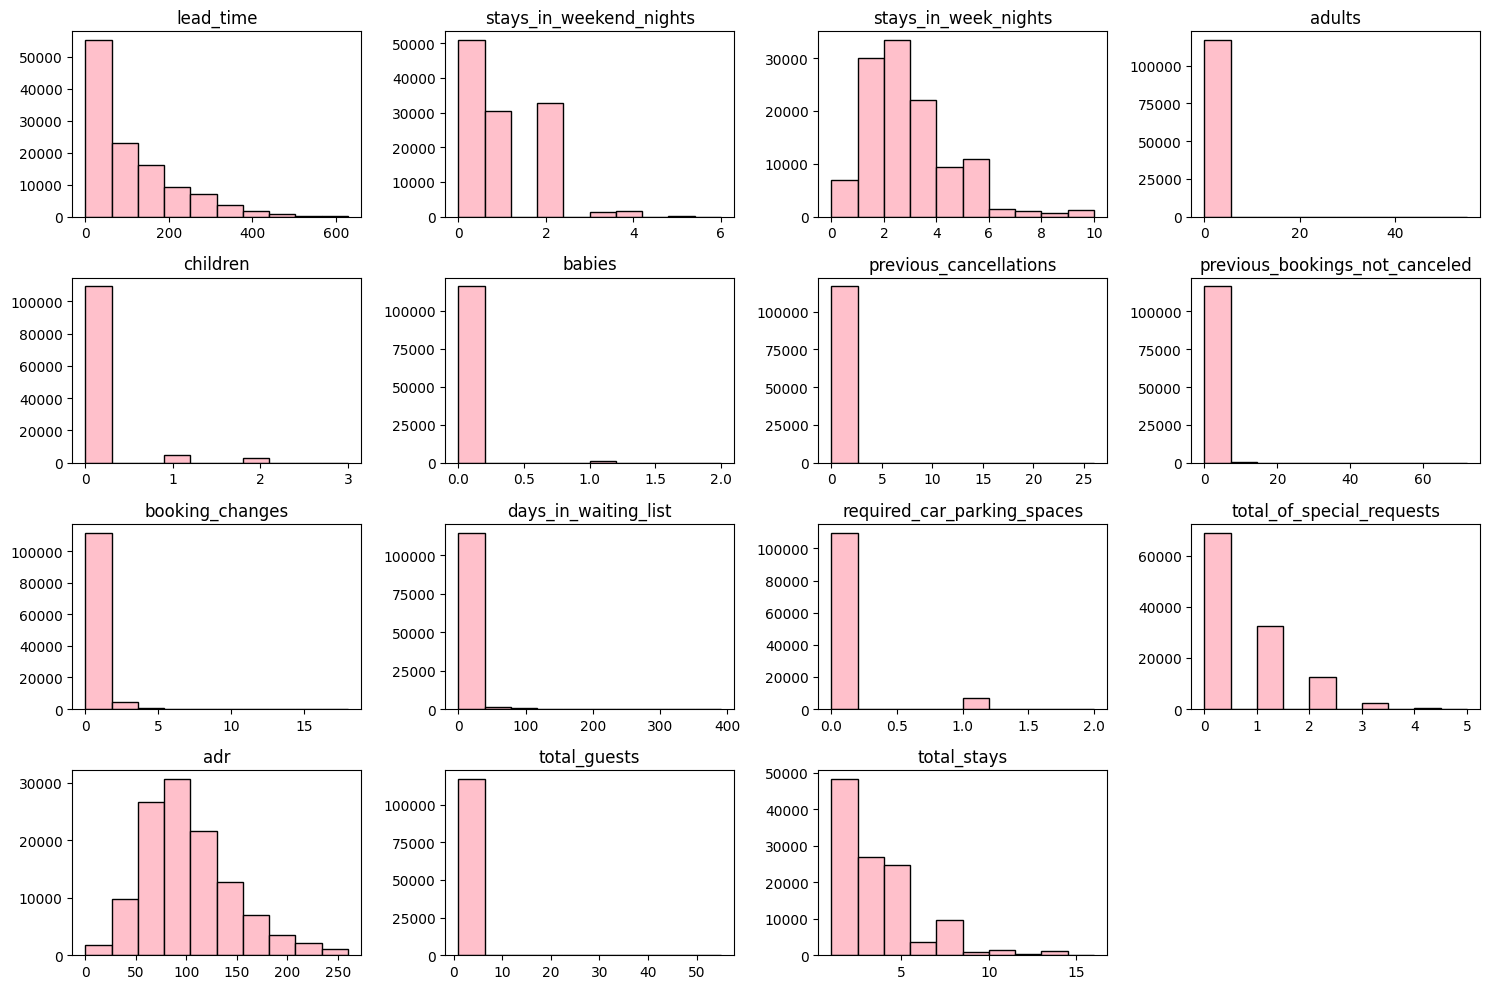

In [ ]:
plot_histogram(df[numerical_features], 4, 4, numerical_features)

Như phân tích trên, các thuộc tính hầu hết có phân phối lệch phải mạnh, chỉ có thuộc tính adr có phân phối lệch phải nhẹ. Một số thuộc tính đã được chia giỏ dữ liệu nên sẽ drop các thuộc tính này. Hướng xử lý:
- lead_time: log-transform
- stays_in_weekend_nights, stay_in_week_nights, total_stays: giữ nguyên total_stays, bỏ stays_in...
- adults, children, babies: bỏ do đã có total_guests
- Các thuộc tính previous_, booking_changes, days_in_waiting_list: đã chia giỏ, bỏ các thuộc tính này.
- Xem ảnh hưởng các thuộc tính required_car_parking_spaces và total_of_special_requests lên biến mục tiêu.

In [ ]:
df.drop(['stays_in_weekend_nights', 'stays_in_week_nights',
         'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
         ], axis=1, inplace=True)

In [ ]:
df.drop(['adults', 'children', 'babies'], axis=1, inplace=True)

In [ ]:
numerical_features.remove('stays_in_weekend_nights')
numerical_features.remove('stays_in_week_nights')
numerical_features.remove('adults')
numerical_features.remove('children')
numerical_features.remove('babies')
numerical_features.remove('previous_cancellations')
numerical_features.remove('previous_bookings_not_canceled')
numerical_features.remove('booking_changes')
numerical_features.remove('days_in_waiting_list')

### Định tính

In [ ]:
len(categorical_features)

26

In [ ]:
len(categorical_nunique)

16

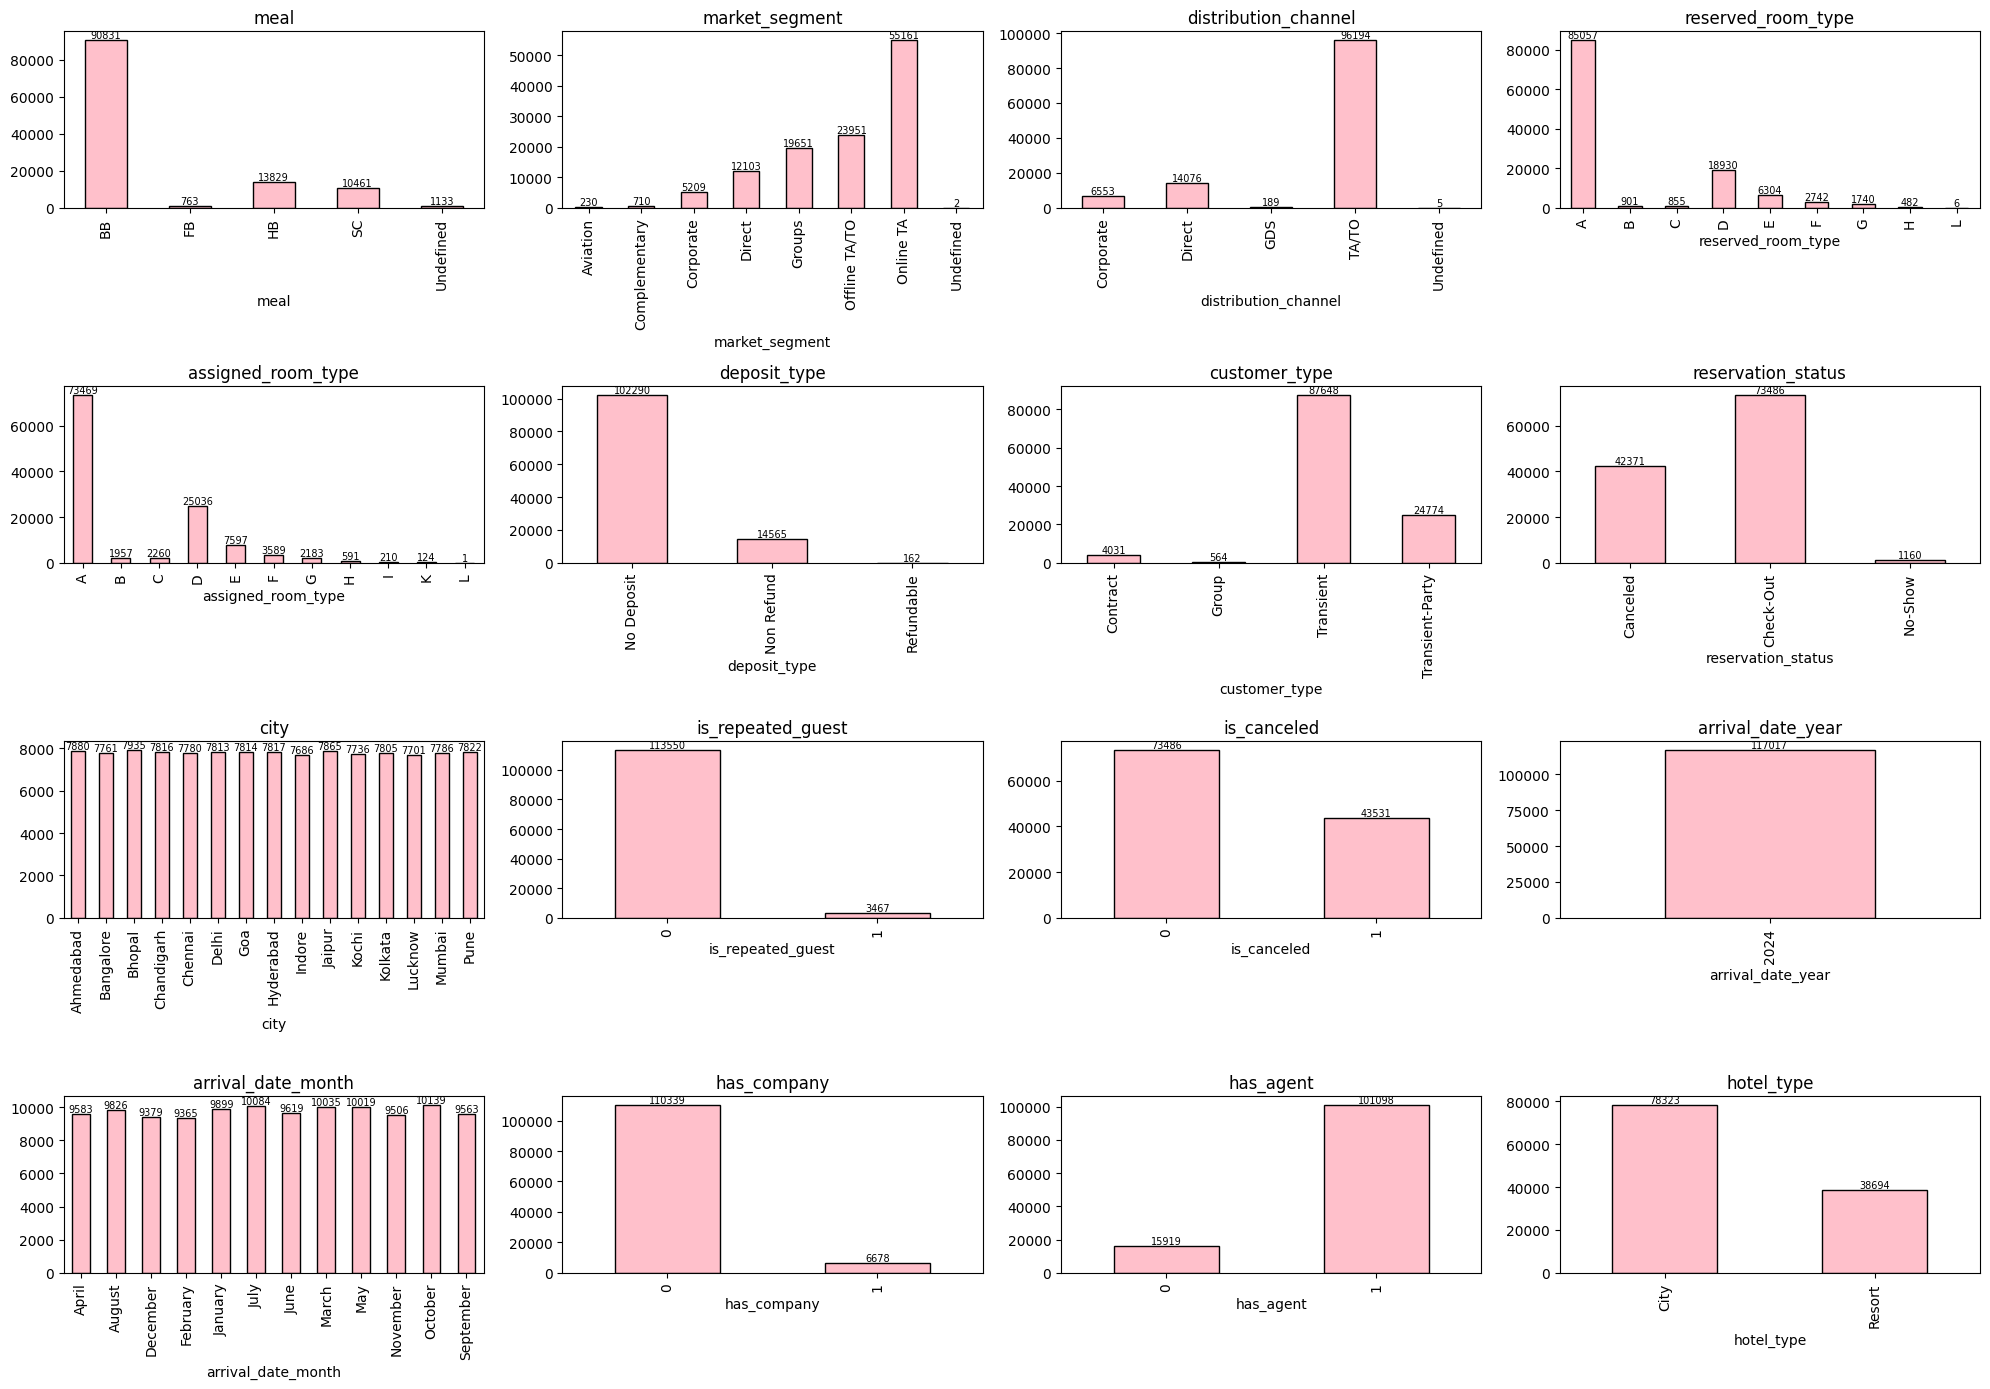

In [ ]:
plot_barchart(df[categorical_nunique], 4, 4, categorical_nunique, size=(20,14))

Xem phân bố cho thấy phần lớn các thuộc tính định tính phân bố không đều. Tuy nhiên có thuộc tính city, arrival_date_month phân bố khá đều. Hướng xử lý:
- Kiểm định thống kê, trực quan giữa các nhóm đối với biến mục tiêu. Nếu có thông tin quan trọng thì giữ, nếu không có thông tin quan trọng (giữa các nhóm không có sự khác biệt) thì bỏ biến.

## Biến đầu vào và biến mục tiêu

### Biến định lượng và biến mục tiêu

#### Biến adr và lead_time



In [ ]:
def plot_boxplot_target(df, n_rows, n_cols, columns, figsize=(15,10), target='is_canceled'):
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
  if n_rows*n_cols > 1:
    axes = axes.flatten()
  else:
    axes = [axes]
  for i, col in enumerate(columns):
    ax = axes[i]
    sns.boxplot(x=target, y=col, data=df, ax=ax, color='pink')
    ax.set_title(col)
  for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()

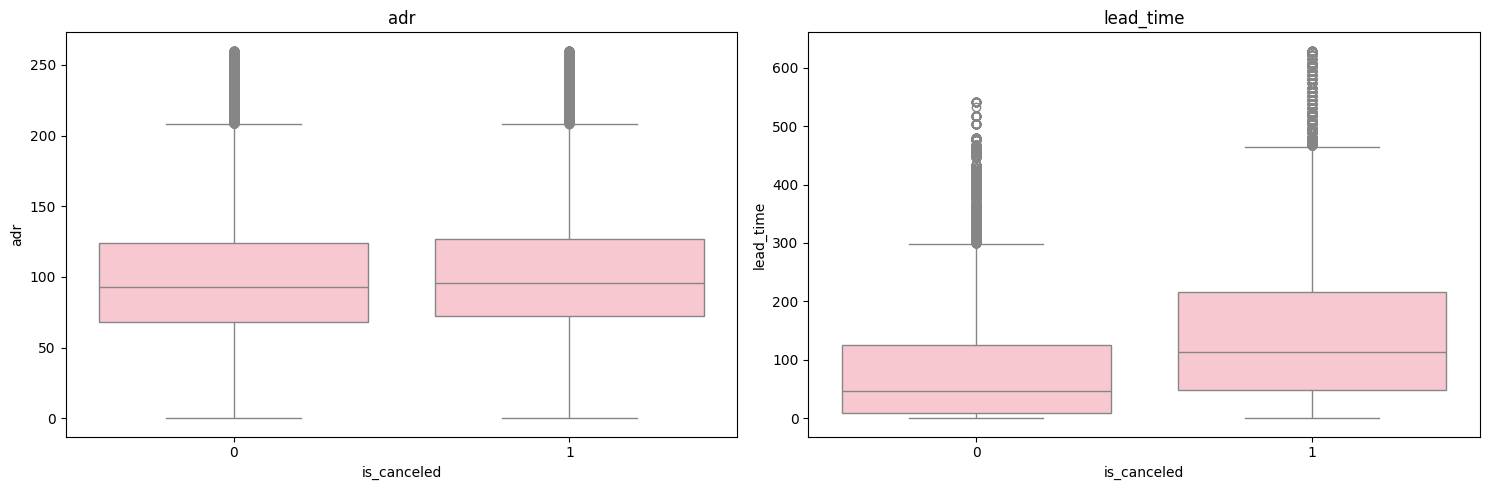

In [ ]:
plot_boxplot_target(df,1,2,['adr','lead_time'], figsize=(15,5))

In [ ]:
df.groupby('is_canceled')['adr'].agg(['mean', 'median', 'std'])

,mean,median,std
is_canceled,,,
0,99.558733,93.000000,45.309684
1,103.697769,96.000000,43.195191


In [ ]:
df.groupby('is_canceled')['lead_time'].agg(['mean', 'median', 'std'])

,mean,median,std
is_canceled,,,
0,80.511567,46.000000,91.342330
1,145.581494,114.000000,118.905343


Từ boxplot trên cho thấy, adr không ảnh hưởng nhiều đến việc hủy hay không hủy phòng. Do đó biến này không mang lại nhiều thông tin hữu ích cho mô hình -> drop. Bên cạnh đó, thuộc tính lead_time cho thấy có sự khác biệt rõ rệt về phân phối giữa 2 nhóm: khi nhóm hủy phòng có thời gian từ lúc khách đặt phòng cho tới lúc check-in lớn. Hướng xử lý cho lead_time: log-transform để giảm lệch phải, giảm ảnh hưởng ngoại lai.

In [ ]:
df.drop('adr', axis=1, inplace=True)
numerical_features.remove('adr')

In [ ]:
numerical_features

['lead_time',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_guests',
 'total_stays']

In [ ]:
def plot_barchart_target(df, n_rows, n_cols, columns, figsize=(15,10), target='is_canceled'):
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
  if n_rows*n_cols > 1:
    axes = axes.flatten()
  else:
    axes = [axes]
  for i, col in enumerate(columns):
    ax = axes[i]
    df.groupby(target)[col].value_counts().unstack().plot(kind='bar', stacked=True, ax=ax, colormap='Set3')
    ax.bar_label(ax.containers[0],fontsize=7)
    ax.set_title(col)
  for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()

In [ ]:
def plot_barchart_target_percentage(df, n_rows, n_cols, columns, figsize=(15,10), target='is_canceled'):
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
  if n_rows*n_cols > 1:
    axes = axes.flatten()
  else:
    axes = [axes]
  for i, col in enumerate(columns):
    ax = axes[i]
    df.groupby(target)[col].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=ax, colormap='Set3')
    ax.bar_label(ax.containers[0],fontsize=7)
    ax.set_title(col)
  for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
  plt.tight_layout()

#### Biến total_stays

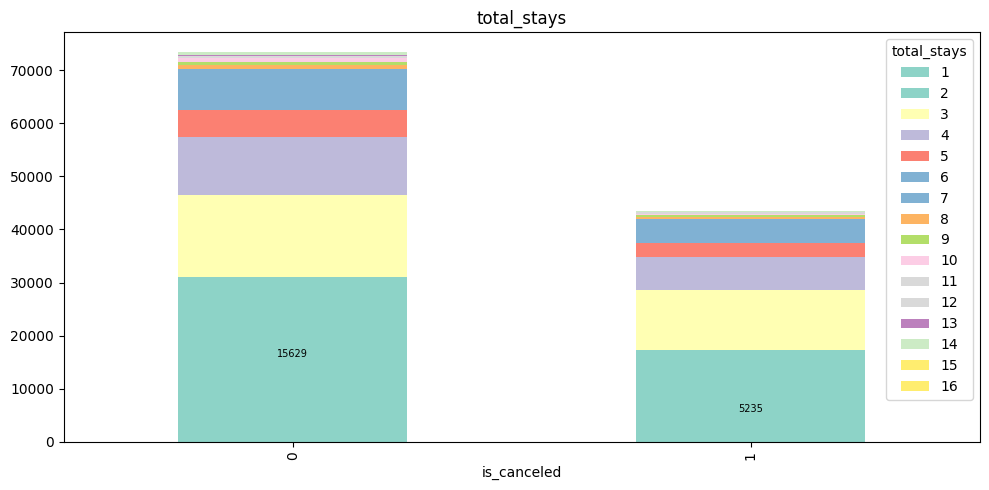

In [ ]:
plot_barchart_target(df, 1,1, ['total_stays'], figsize=(10,5))

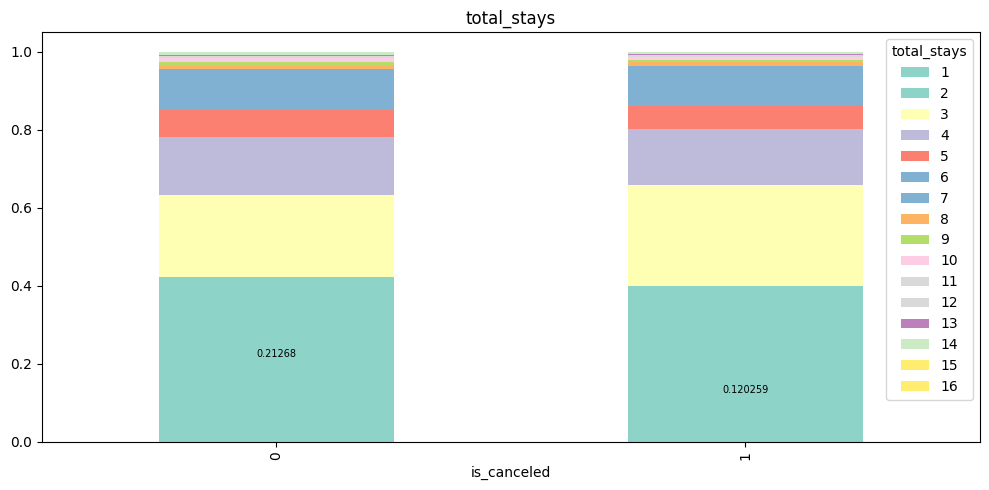

In [ ]:
plot_barchart_target_percentage(df, 1,1, ['total_stays'], figsize=(10,5))

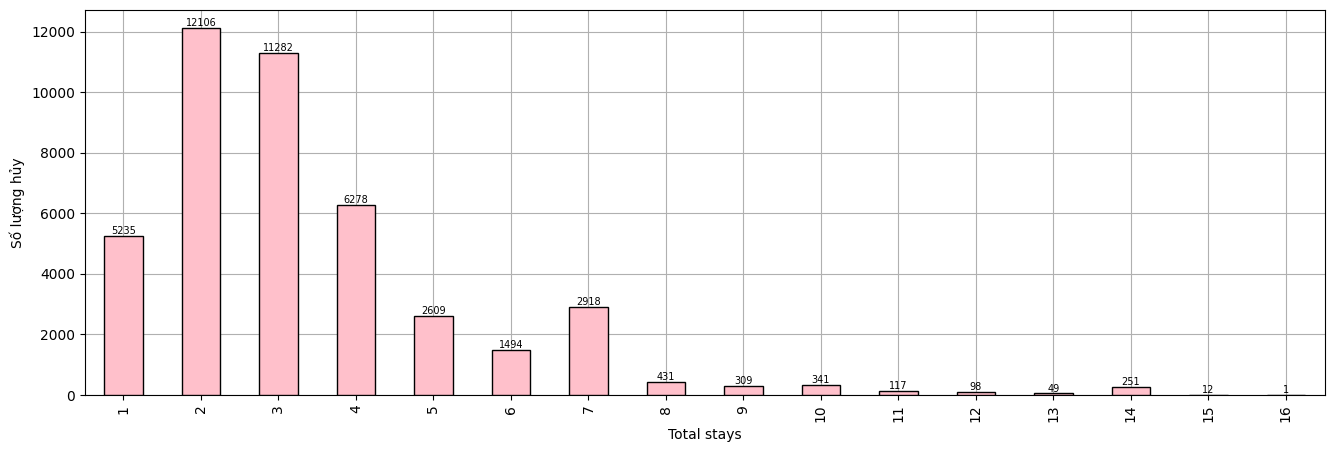

In [ ]:
# Số lượng hủy phòng của các giá trị total_stays
rate = df.groupby('total_stays')['is_canceled'].sum()
ax = rate.plot(kind='bar', color='pink', edgecolor='black',figsize=(16,5),zorder=3)
ax.grid(True, zorder=0)
ax.bar_label(ax.containers[0],fontsize = 7)
ax.set_ylabel('Số lượng hủy')
ax.set_xlabel('Total stays');

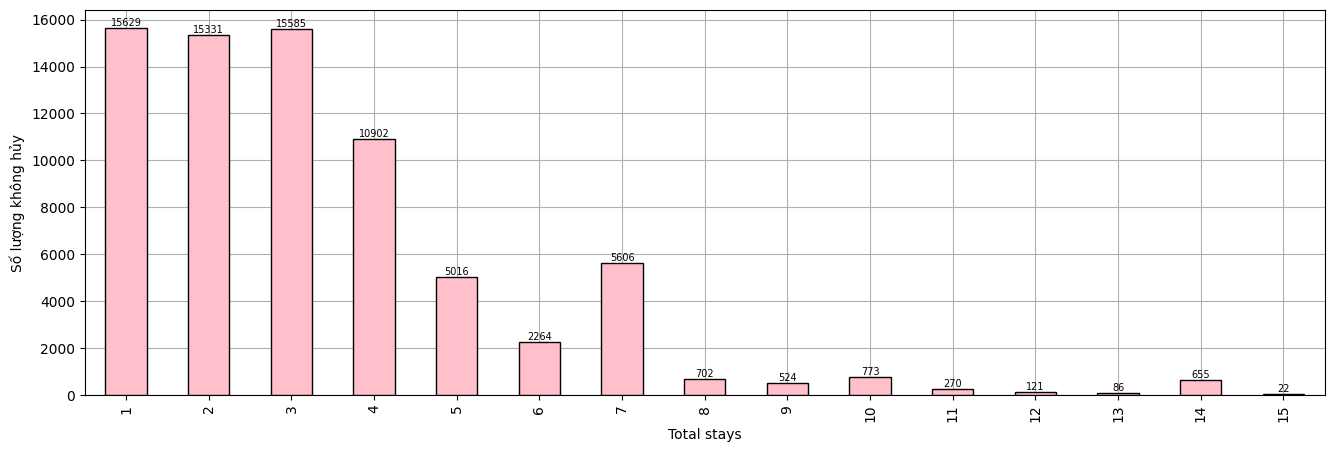

In [ ]:
rate = df[df['is_canceled'] == 0].groupby('total_stays')['is_canceled'].count()
ax = rate.plot(kind='bar', color='pink', edgecolor='black',figsize=(16,5),zorder=3)
ax.grid(True, zorder=0)
ax.bar_label(ax.containers[0],fontsize = 7)
ax.set_ylabel('Số lượng không hủy')
ax.set_xlabel('Total stays');

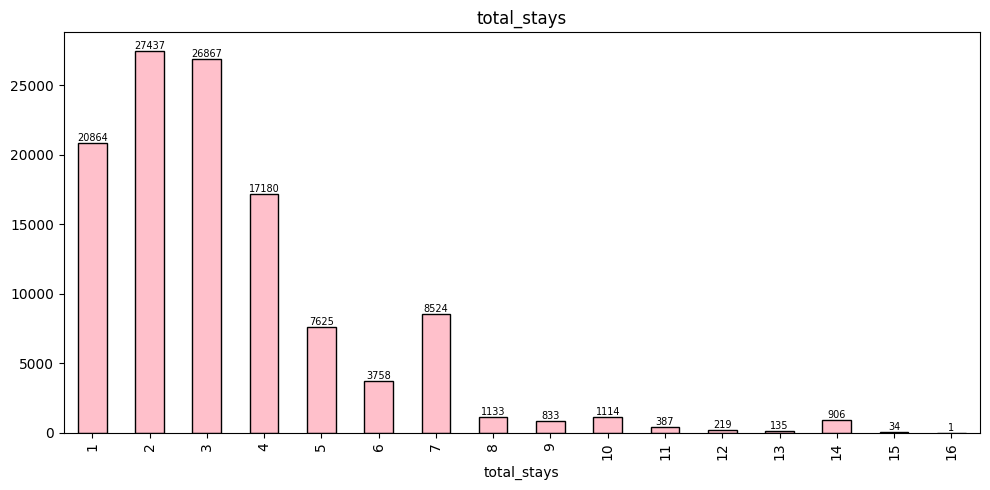

In [ ]:
plot_barchart(df, 1,1, ['total_stays'],size=(10,5))

Từ kết quả trực quan trên cho thấy, có một số khác biệt giữa phân bố của số đêm ở của khách. Vì vậy nên giữ biến total_stays cho mô hình để mô hình học được xu hướng: stay dài thì hành vi khác. Hướng xử lý: giữ nguyên.


#### Biến total_guests

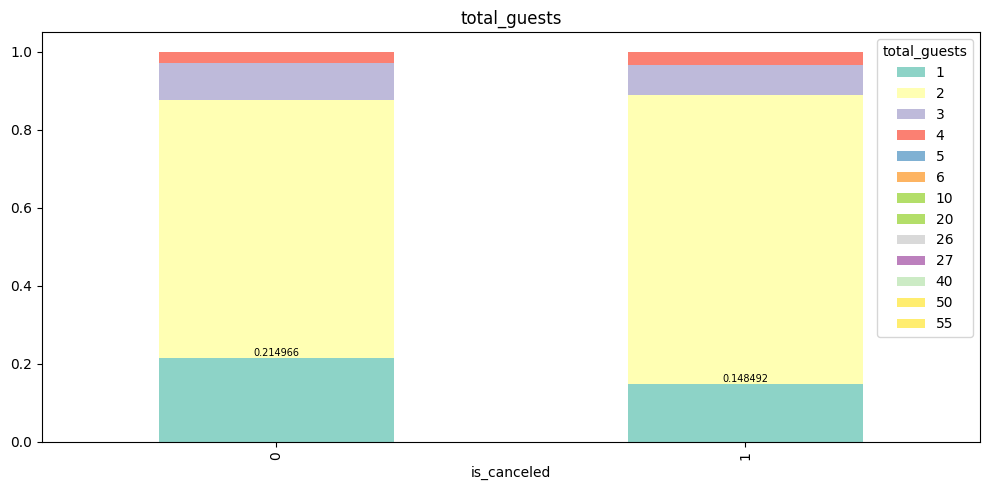

In [ ]:
plot_barchart_target_percentage(df, 1,1, ['total_guests'], figsize=(10,5))

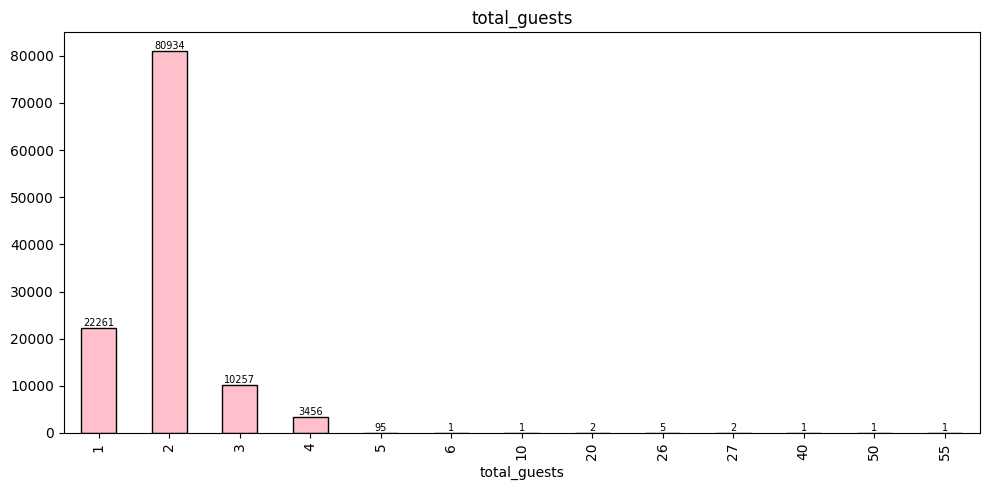

In [ ]:
plot_barchart(df[['total_guests']], 1, 1, ['total_guests'], size=(10,5))

Từ kết quả trực quan cho thấy có sự khác biệt trong các nhóm hủy và không hủy của số lượng khách, vì vậy nên giữ biến này cho mô hình. Tuy nhiên các giá trị rời rạc này không phải Hướng xử lý: giữ nguyên, vì các giá trị >= 5 đến 55 cực kỳ hiếm (vài dòng, thậm chí 1 dòng), không tạo thành đuôi liên tục, chứng tỏ đây là booking theo đoàn hoặc sự kiện, hợp lệ, không phải lỗi và đây là biến đếm rời rạc.

#### Biến required_car_parking_spaces và total_of_special_requests

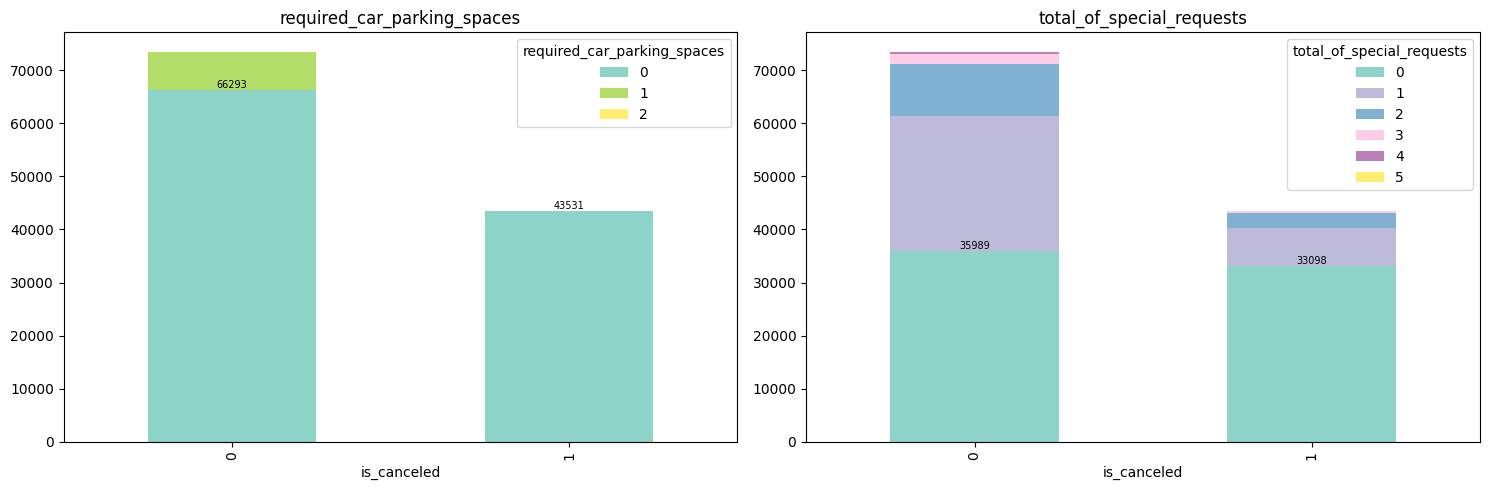

In [ ]:
plot_barchart_target(df, 1,2, ['required_car_parking_spaces','total_of_special_requests'], figsize=(15,5))

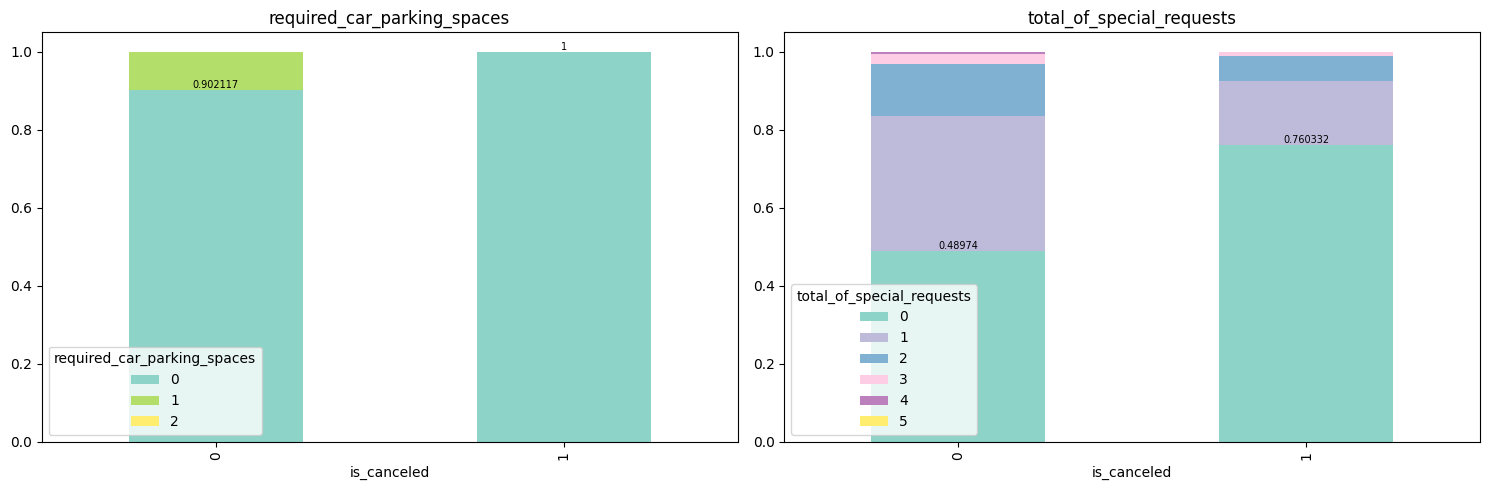

In [ ]:
plot_barchart_target_percentage(df, 1,2, ['required_car_parking_spaces','total_of_special_requests'], figsize=(15,5))

Quan sát cho thấy có sự khác biệt trong nhóm hủy và không hủy đối với thuộc tính required_car_parking_spaces và total_of_special_requests

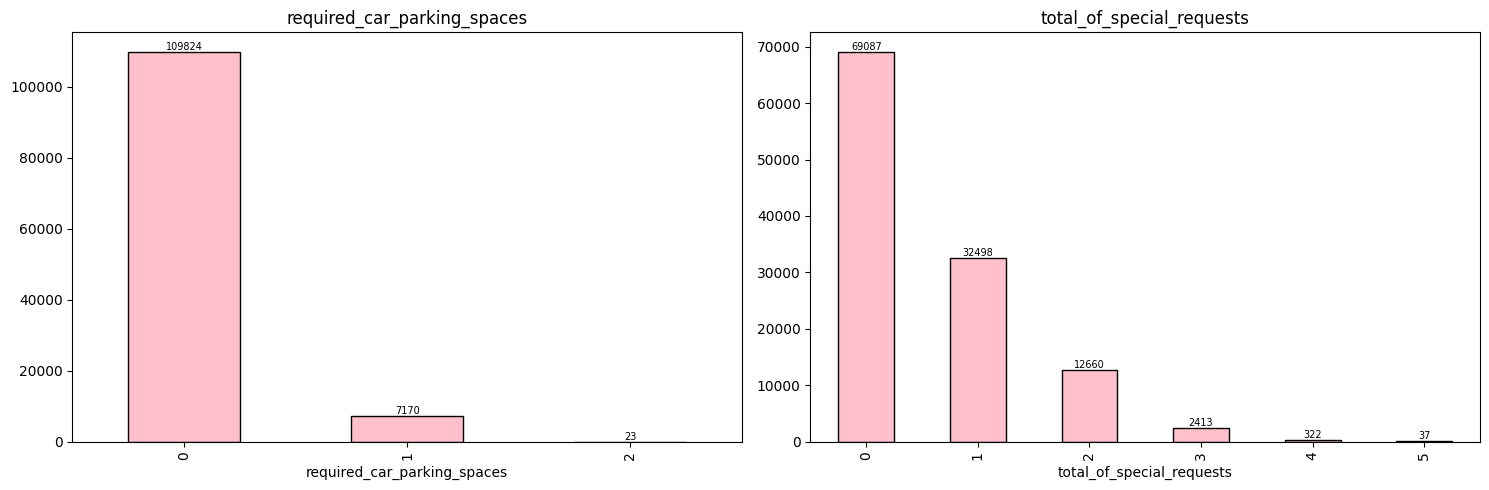

In [ ]:
plot_barchart(df[['required_car_parking_spaces','total_of_special_requests']], 1, 2, ['required_car_parking_spaces','total_of_special_requests'], size=(15,5))

Từ kết quả trực quan cho thấy: 2 thuộc tính số lượng chỗ đậu xe yêu cầu và tổng số yêu cầu đặc biệt lệch phải, tuy nhiên đó không phải outliers lớn (giá trị hiếm nhưng vẫn nằm trong phạm vi hợp lý), và đây là biến rời rạc nên không scale mà giữ nguyên.

#### Kiểm tra đa cộng tuyến qua ma trận tương quan

<Axes: >

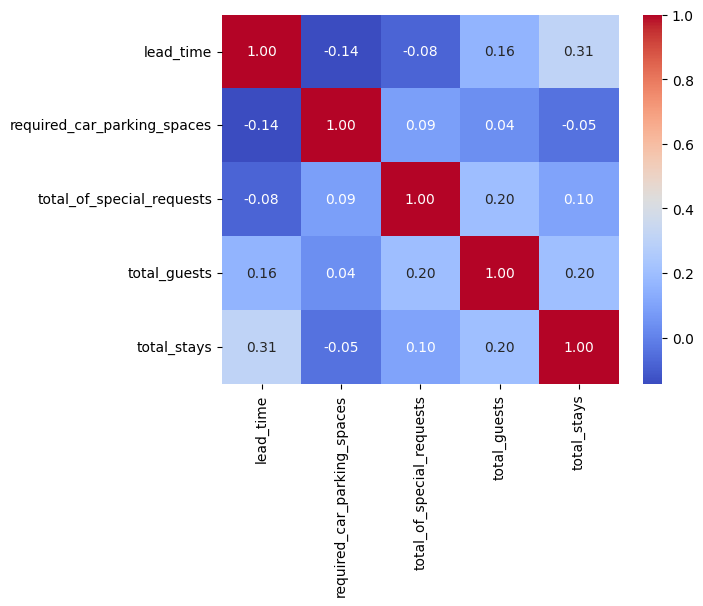

In [ ]:
df_corr = df[numerical_features].corr(method='spearman')
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f') # tương quan spearman

#### **Tổng kết**
- lead_time: log transform
- total_guests, total_stays, required_car_parking_spaces, total_of_special_requests: giữ nguyên

Hầu hết các biến đầu vào trên đều không có tương quan cao với nhau. Vì vậy nên sẽ đem các biến trên vào mô hình.

### Biến định tính và biến mục tiêu

In [ ]:
from scipy.stats import chi2_contingency

Dùng kiểm định chi-squared kết hợp cramers v giữa 2 biến categorical. Giả thuyết:
- H0: biến độc lập với is_canceled
- H1: biến có liên hệ với is_canceled

Với mức ý nghĩa alpha = 0.05.
- p <= 0.05: bác bỏ H0
- p > 0.05: không đủ bằng chứng bác bỏ H0

In [ ]:
def chi_square(df, col1, col2):
  table = pd.crosstab(df[col1], df[col2])
  chi2, p, dof, expected = chi2_contingency(table)
  print(f'p-value: {p:.6f}')
  n = table.sum().sum()
  phi2 = chi2 / n
  r, k = table.shape
  cramers_v = np.sqrt(phi2 / (min(r-1, k-1)))
  print(f'cramers_v: {cramers_v:.6f}')
  return table

#### Các biển gây rò rỉ data

Các biến reservation_status... gây rò rỉ data, vì vậy loại bỏ các biến này.

In [ ]:
leakage_cols = [
    'reservation_status',
    'reservation_status_day',
    'reservation_status_month',
    'reservation_status_year'
]
df.drop(leakage_cols, axis=1, inplace=True)
categorical_features.remove('reservation_status')

In [ ]:
categorical_features.remove('reservation_status_day')
categorical_features.remove('reservation_status_month')
categorical_features.remove('reservation_status_year')

In [ ]:
categorical_features

['meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'city',
 'is_repeated_guest',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'has_company',
 'has_agent',
 'hotel_type',
 'previous_cancellations_group',
 'previous_bookings_not_canceled_group',
 'booking_changes_group',
 'days_in_waiting_list_group']

#### Biến 'meal', 'country', 'market_segment', 'distribution_channel'

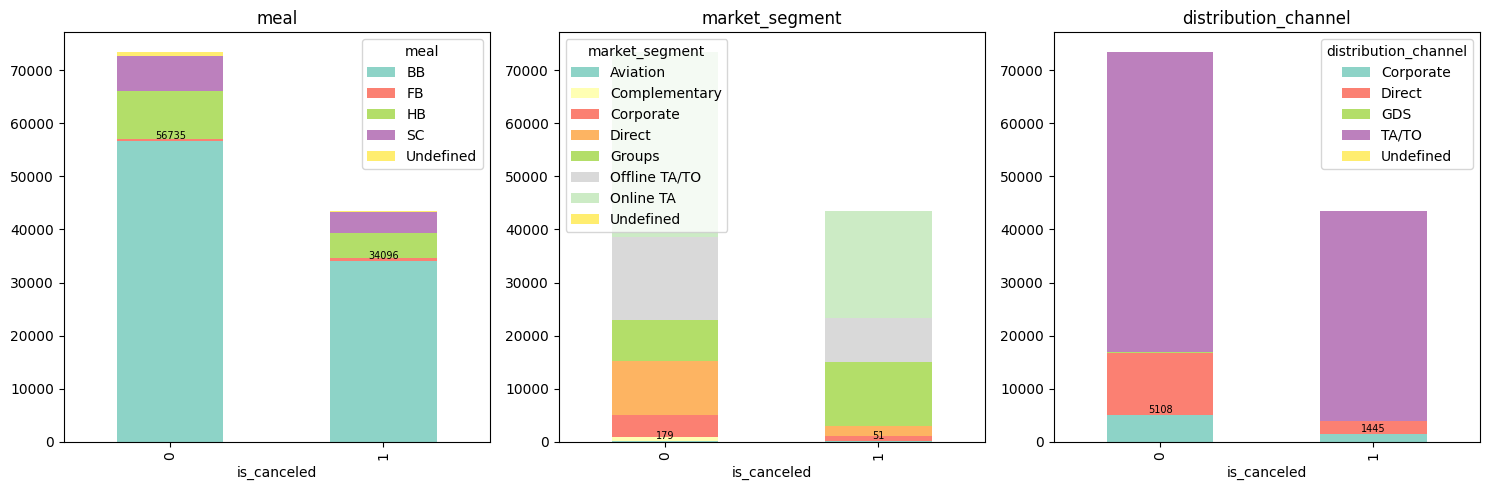

In [ ]:
plot_barchart_target(df, 1,3 , ['meal', 'market_segment', 'distribution_channel'], figsize=(15,5))

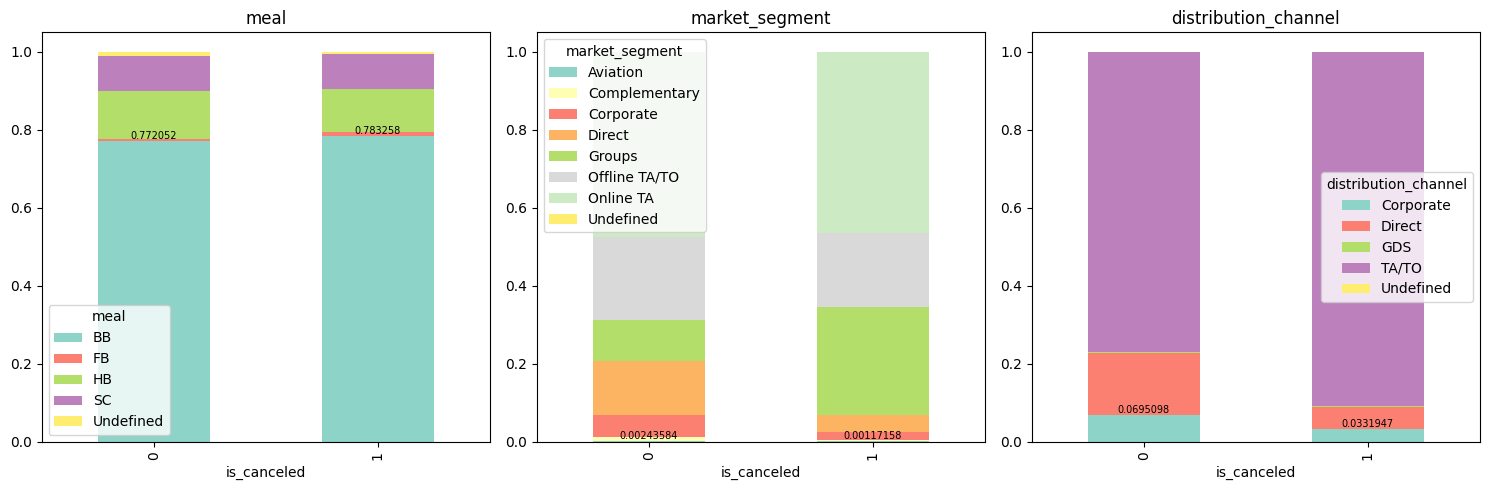

In [ ]:
plot_barchart_target_percentage(df, 1,3 , ['meal', 'market_segment', 'distribution_channel'], figsize=(15,5))

In [ ]:
df[df['is_canceled'] == 0]['country'].value_counts(normalize=True)

,proportion
country,
PRT,0.274324
GBR,0.130038
FRA,0.114076
ESP,0.084588
DEU,0.082056
...,...
KIR,0.000014
ATF,0.000014
TJK,0.000014


In [ ]:
df[df['is_canceled'] == 1]['country'].value_counts(normalize=True)

,proportion
country,
PRT,0.625049
GBR,0.055616
ESP,0.048540
FRA,0.043762
ITA,0.030277
...,...
TMP,0.000023
LIE,0.000023
UMI,0.000023


In [ ]:
chi_square(df, 'meal', 'is_canceled') # cramers_v rất nhỏ, cho thấy ảnh hưởng không đáng kể

p-value: 0.000000
cramers_v: 0.051977


is_canceled,0,1
meal,,
BB,56735,34096
FB,294,469
HB,9055,4774
SC,6548,3913
Undefined,854,279


In [ ]:
chi_square(df, 'distribution_channel', 'is_canceled')

p-value: 0.000000
cramers_v: 0.176545


is_canceled,0,1
distribution_channel,,
Corporate,5108,1445
Direct,11609,2467
GDS,153,36
TA/TO,56615,39579
Undefined,1,4


In [ ]:
chi_square(df, 'market_segment', 'is_canceled')

p-value: 0.000000
cramers_v: 0.267962


is_canceled,0,1
market_segment,,
Aviation,179,51
Complementary,624,86
Corporate,4232,977
Direct,10254,1849
Groups,7617,12034
Offline TA/TO,15670,8281
Online TA,34910,20251
Undefined,0,2


In [ ]:
chi_square(df, 'country', 'is_canceled')

p-value: 0.000000
cramers_v: 0.368606


is_canceled,0,1
country,,
ABW,2,0
AGO,152,148
ALB,10,2
AND,1,5
ARE,7,40
...,...,...
VGB,0,1
VNM,6,2
ZAF,47,31


In [ ]:
df['country'].value_counts().sort_values(ascending=False)

,count
country,
PRT,47368
GBR,11977
FRA,10288
ESP,8329
DEU,7242
...,...
MRT,1
KIR,1
SDN,1


Từ kết quả trực quan và kiểm định cho thấy:
- Biến meal: không có nhiều khác biệt về phân bố trong nhóm hủy và nhóm không hủy.
- Biến market_segment và distribution_cnannel: có ảnh hưởng trung bình đến hủy /không hủy
- Biến country: có mối liên hệ khá mạnh với khả năng hủy/không hủy
Hướng xử lý:
- Bỏ meal.
- OHE cho market_segment và distribution_channel
- Gom nhóm, chia giỏ cho country.


#### Biến 'reserved_room_type','assigned_room_type', 'deposit_type, 'customer_type', 'city'

In [ ]:
chi_square(df, 'reserved_room_type', 'is_canceled')

p-value: 0.000000
cramers_v: 0.073251


is_canceled,0,1
reserved_room_type,,
A,51631,33426
B,617,284
C,573,282
D,12893,6037
E,4446,1858
F,1910,832
G,1123,617
H,289,193
L,4,2


In [ ]:
chi_square(df, 'assigned_room_type', 'is_canceled')

p-value: 0.000000
cramers_v: 0.201866


is_canceled,0,1
assigned_room_type,,
A,40709,32760
B,1529,428
C,1851,409
D,18740,6296
E,5687,1910
F,2710,879
G,1548,635
H,392,199
I,206,4


In [ ]:
chi_square(df, 'deposit_type', 'is_canceled')

p-value: 0.000000
cramers_v: 0.484931


is_canceled,0,1
deposit_type,,
No Deposit,73267,29023
Non Refund,93,14472
Refundable,126,36


Đây là insights quan trọng, Non Refund (không hoàn tiền) lại có khả năng hủy cao hơn dù ràng buộc đối với khách mạnh (thông thường vì đặt cọc không hoàn tiền khi hủy sẽ không được hoàn trả lại -> khách sẽ ngại hủy hơn).

=> Biến deposit_type có mối quan hệ rất mạnh với khả năng hủy đặt phòng. Đặc biệt, các booking thuộc nhóm Non Refund có tỷ lệ hủy rất cao, phản ánh thực tế rằng việc không hoàn tiền không đồng nghĩa với việc khách không hủy, mà chỉ làm tăng chi phí khi hủy.

Nhóm đặt phòng thuộc loại Non Refund có tỷ lệ hủy cao do chính sách không hoàn tiền không ngăn cản hành vi hủy, mà chỉ làm tăng chi phí khi hủy. Nhóm khách này thường đặt sớm, dẫn đến xác suất thay đổi kế hoạch cao hơn và tỷ lệ booking không diễn ra lớn.

In [ ]:
df.groupby('deposit_type')['lead_time'].mean()
# trung bình khoảng cách giữa ngày đặt phòng và ngày check-in của non refund cao nhất => nhóm non refund đặt phòng sớm nhất

,lead_time
deposit_type,
No Deposit,89.221644
Non Refund,213.021559
Refundable,152.098765


In [ ]:
chi_square(df, 'customer_type', 'is_canceled')

p-value: 0.000000
cramers_v: 0.138625


is_canceled,0,1
customer_type,,
Contract,2779,1252
Group,510,54
Transient,51729,35919
Transient-Party,18468,6306


In [ ]:
chi_square(df, 'city', 'is_canceled')

p-value: 0.202747
cramers_v: 0.012433


is_canceled,0,1
city,,
Ahmedabad,4922,2958
Bangalore,4787,2974
Bhopal,5062,2873
Chandigarh,4937,2879
Chennai,4899,2881
Delhi,4971,2842
Goa,4946,2868
Hyderabad,4818,2999
Indore,4818,2868


Trực quan cho các biến có ảnh hưởng mạnh: assigned_room_type, deposit_type, customer_type

In [ ]:
df['is_different_room'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

In [ ]:
df['is_different_room'].value_counts(normalize=True)

,proportion
is_different_room,
0,0.877608
1,0.122392


In [ ]:
df.groupby('is_different_room')['is_canceled'].value_counts(normalize=True)

is_different_room  is_canceled
0                  0             0.583670
                   1             0.416330
1                  0             0.945818
                   1             0.054182
Name: proportion, dtype: float64

In [ ]:
chi_square(df, 'is_different_room', 'is_canceled')

p-value: 0.000000
cramers_v: 0.245535


is_canceled,0,1
is_different_room,,
0,59940,42755
1,13546,776


Thử tạo cột mới là phòng đặt trước và phòng được khách sạn bố trí khi check-in có khác nhau không, qua kiểm định thấy có liên hệ đến biến mục tiêu. Vì vậy sẽ thêm cột này vào dataset.

In [ ]:
categorical_features.append('is_different_room')

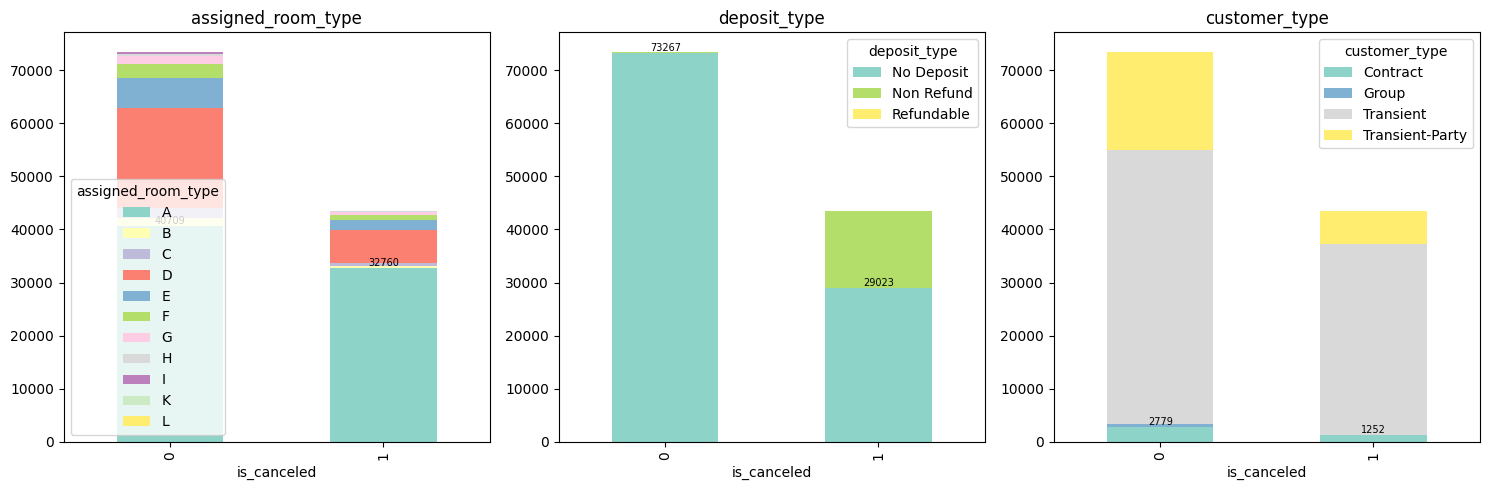

In [ ]:
plot_barchart_target(df, 1,3 , ['assigned_room_type', 'deposit_type', 'customer_type'], figsize=(15,5))

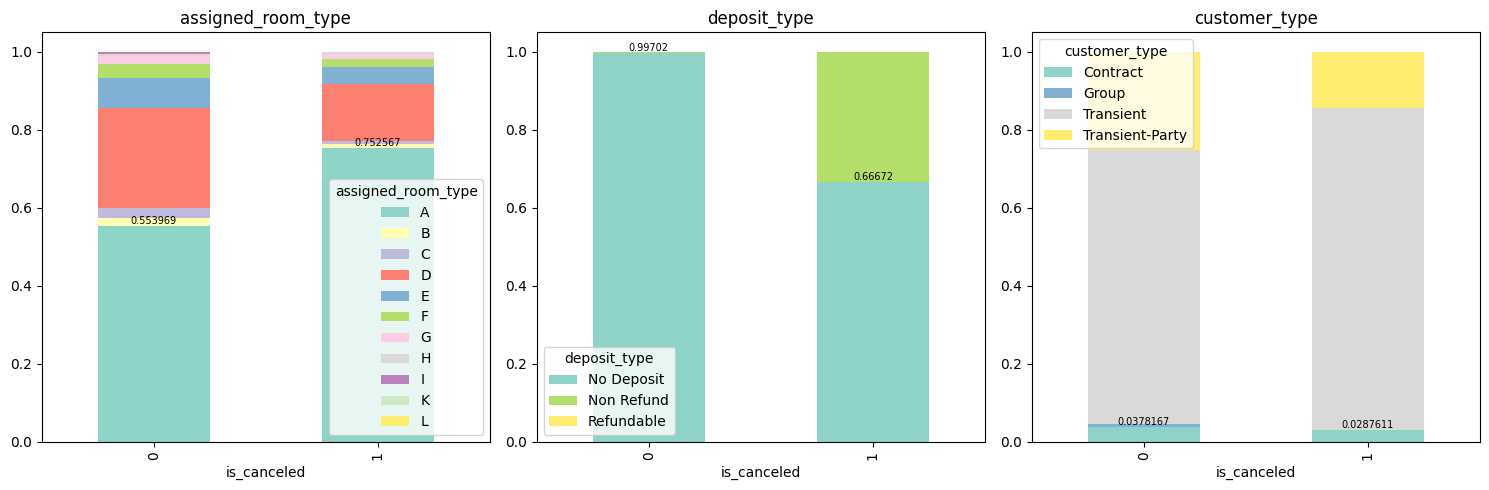

In [ ]:
plot_barchart_target_percentage(df, 1,3 , ['assigned_room_type', 'deposit_type', 'customer_type'], figsize=(15,5))

Từ kết quả trực quan và kiểm định trên cho thấy:
- Biến reserved_room_type, city: không có nhiều ảnh hưởng đến is_canceled
- 3 biến còn lại, có ảnh hưởng. Biến deposit_type ảnh hưởng đáng kể.

Hướng xử lý:
- Bỏ city, reserved_room_type.
- Biến assigned_room_type, customer_type dùng OHE.
- deposit_type dùng Label encoding (No Deposit < Refundable < Non Refund)

deposit_map = {
    'No Deposit': 0,
    'Refundable': 1,
    'Non Refund': 2
}

#### Biến is_repeated_guest, arrival_date... (month, week_number, day_of_month)

In [ ]:
chi_square(df, 'is_repeated_guest', 'is_canceled')

p-value: 0.000000
cramers_v: 0.077710


is_canceled,0,1
is_repeated_guest,,
0,70563,42987
1,2923,544


In [ ]:
chi_square(df, 'arrival_date_month', 'is_canceled')

p-value: 0.621199
cramers_v: 0.008774


is_canceled,0,1
arrival_date_month,,
April,6043,3540
August,6205,3621
December,5931,3448
February,5894,3471
January,6154,3745
July,6346,3738
June,6010,3609
March,6359,3676
May,6292,3727


In [ ]:
chi_square(df, 'arrival_date_week_number', 'is_canceled')

p-value: 0.328813
cramers_v: 0.021662


is_canceled,0,1
arrival_date_week_number,,
1,1564,970
2,1356,830
3,1466,822
4,1380,862
5,1392,876
6,1431,814
7,1397,835
8,1407,856
9,1465,818


In [ ]:
chi_square(df, 'arrival_date_day_of_month', 'is_canceled')

p-value: 0.241724
cramers_v: 0.017301


is_canceled,0,1
arrival_date_day_of_month,,
1,2381,1480
2,2431,1462
3,2475,1479
4,2377,1429
5,2366,1493
6,2393,1440
7,2457,1443
8,2408,1360
9,2351,1412


Có thể thấy các biến arrival_date ... có p-value cao, đồng nghĩa với việc chấp nhận H0 (biến độc lập với is_canceled), ảnh hưởng cũng thấp (cramer v khá thấp).

Biến is_repeated_guest dù không đủ bằng chứng để chấp nhận việc độc lập với is_canceled, nhưng cramers v lại thấp -> mối liên hệ với is_canceled yếu.

Hướng xử lý:
- Loại bỏ các thuộc tính trên.

In [ ]:
df.drop(['is_repeated_guest', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis=1, inplace=True)
categorical_features.remove('is_repeated_guest')
categorical_features.remove('arrival_date_month')
categorical_features.remove('arrival_date_week_number')
categorical_features.remove('arrival_date_day_of_month')

Loại luôn biến arrival_date_year do chỉ có 1 giá trị

In [ ]:
categorical_features.remove('arrival_date_year')

#### Biến has_company, has_agent, hotel_type

In [ ]:
chi_square(df, 'has_company', 'is_canceled')

p-value: 0.000000
cramers_v: 0.100132


is_canceled,0,1
has_company,,
0,67978,42361
1,5508,1170


In [ ]:
chi_square(df, 'has_agent', 'is_canceled')

p-value: 0.000000
cramers_v: 0.100487


is_canceled,0,1
has_agent,,
0,11946,3973
1,61540,39558


In [ ]:
chi_square(df, 'hotel_type', 'is_canceled')

p-value: 0.000000
cramers_v: 0.137659


is_canceled,0,1
hotel_type,,
City,45523,32800
Resort,27963,10731


Từ các kiểm định trên cho thấy, các biến hotel_type, has_company, has_agent có thể có liên hệ trung bình đến khả năng hủy phòng.

Hướng xử lý:
- Giữ nguyên cho has_company, has_agent
- OHE cho hotel_type

#### Các biến _group

In [ ]:
chi_square(df, 'previous_cancellations_group', 'is_canceled')

p-value: 0.000000
cramers_v: 0.272911


is_canceled,0,1
previous_cancellations_group,,
0,72951,37604
1-5,494,5766
>5,41,161


In [ ]:
df.groupby('previous_cancellations_group')['is_canceled'].value_counts(normalize=True)

previous_cancellations_group  is_canceled
0                             0             0.659862
                              1             0.340138
1-5                           1             0.921086
                              0             0.078914
>5                            1             0.797030
                              0             0.202970
Name: proportion, dtype: float64

Nhóm có nhiều lần hủy đặt phòng trước thì khả năng hủy cũng cao hơn.

In [ ]:
chi_square(df, 'previous_bookings_not_canceled_group', 'is_canceled')

p-value: 0.000000
cramers_v: 0.115911


is_canceled,0,1
previous_bookings_not_canceled_group,,
0,70130,43334
1-5,2655,148
>5,701,49


In [ ]:
df.groupby('previous_bookings_not_canceled_group')['is_canceled'].value_counts(normalize=True)

previous_bookings_not_canceled_group  is_canceled
0                                     0             0.618082
                                      1             0.381918
1-5                                   0             0.947199
                                      1             0.052801
>5                                    0             0.934667
                                      1             0.065333
Name: proportion, dtype: float64

Nhóm có nhiều lịch sử bookings không hủy có khả năng hủy thấp hơn nhóm chưa có lần nào đặt phòng/chưa có lần nào đặt phòng mà không hủy.

In [ ]:
chi_square(df, 'booking_changes_group', 'is_canceled')

p-value: 0.000000
cramers_v: 0.186877


is_canceled,0,1
booking_changes_group,,
0,58764,40804
1-2,13514,2476
>2,1208,251


In [ ]:
df.groupby('booking_changes_group')['is_canceled'].value_counts(normalize=True)

booking_changes_group  is_canceled
0                      0             0.590190
                       1             0.409810
1-2                    0             0.845153
                       1             0.154847
>2                     0             0.827964
                       1             0.172036
Name: proportion, dtype: float64

Nhóm nhiều lần thay đổi thông tin đặt phòng có khả năng hủy cao hơn nhóm chỉ thay đổi 1-2 lần, nhưng thấp hơn nhiều so với nhóm không đổi booking, có thể là do cẩn thận hơn trong quá trình booking => khả năng không hủy cũng cao hơn.

In [ ]:
chi_square(df, 'days_in_waiting_list_group', 'is_canceled')

p-value: 0.000000
cramers_v: 0.103802


is_canceled,0,1
days_in_waiting_list_group,,
no_wait,72161,41174
short,47,79
medium,95,368
long,741,1393
very_long,442,517


In [ ]:
df.groupby('days_in_waiting_list_group')['is_canceled'].value_counts(normalize=True)

days_in_waiting_list_group  is_canceled
no_wait                     0             0.636705
                            1             0.363295
short                       1             0.626984
                            0             0.373016
medium                      1             0.794816
                            0             0.205184
long                        1             0.652765
                            0             0.347235
very_long                   1             0.539103
                            0             0.460897
Name: proportion, dtype: float64

Nhóm đợi có khả năng hủy cao hơn hẳn nhóm không đợi.

In [ ]:
pd.Series({col: df[col].unique() for col in df.columns if '_group' in col})

,0
previous_cancellations_group,"['0', '1-5', '>5'] Categories (3, object): ['0..."
previous_bookings_not_canceled_group,"['0', '1-5', '>5'] Categories (3, object): ['0..."
booking_changes_group,"['0', '1-2', '>2'] Categories (3, object): ['0..."
days_in_waiting_list_group,"['no_wait', 'long', 'very_long', 'medium', 'sh..."


Từ các kết quả kiểm định trên cho thấy có thể có mối liên hệ giữa các biến trên với khả năng hủy/đặt phòng.
Hướng xử lý:
- Ordinal Encoding:
1. previous_cancellations_group:
map_prev_cancel = {'0': 0, '1-5': 1, '>5': 2}
2. previous_bookings_not_canceled_group: map_prev_not_cancel = {'0': 0, '1-5': 1, '>5': 2}
3. booking_changes_group: map_booking_changes = {'0': 0, '1-2': 1, '>2': 2}
4. days_in_waiting_list_group: map_waiting = {
    'no_wait': 0,
    'short': 1,
    'medium': 2,
    'long': 3,
    'very_long': 4
}


#### **Tổng kết**
- Bỏ meal.
- Bỏ city, reserved_room_type.
- Giữ nguyên cho has_company, has_agent, is_different_room
- Gom nhóm cho country, sau đó OHE.
- Onehot encoding cho market_segment và distribution_channel, assigned_room_type, customer_type, hotel_type
- Ordinal Encoding:
1. previous_cancellations_group:
    - map_prev_cancel = {'0': 0, '1-5': 1, '>5': 2}
2. previous_bookings_not_canceled_group:
    - map_prev_not_cancel = {'0': 0, '1-5': 1, '>5': 2}
3. booking_changes_group:
    - map_booking_changes = {'0': 0, '1-2': 1, '>2': 2}
4. days_in_waiting_list_group:
    - map_waiting = {
    'no_wait': 0,
    'short': 1,
    'medium': 2,
    'long': 3,
    'very_long': 4
}
5. deposit_type: (No Deposit < Refundable < Non Refund)
    - deposit_map = {
    'No Deposit': 0,
    'Refundable': 1,
    'Non Refund': 2
}



# Xử lý dữ liệu cho mô hình

## Bỏ các thuộc tính

In [ ]:
df.drop(columns={'meal', 'city', 'reserved_room_type'}, inplace=True)
categorical_features.remove('meal')
categorical_features.remove('city')
categorical_features.remove('reserved_room_type')

### Gom nhóm cho country

In [ ]:
top_countries = df['country'].value_counts()[(df['country'].value_counts() > 1000)].index # các country có số lần xuất hiện > 1000
len(top_countries)

15

In [ ]:
df['country_group'] = df['country'].where(
    df['country'].isin(top_countries), 'Other'
)

In [ ]:
chi_square(df, 'country_group', 'is_canceled')

p-value: 0.000000
cramers_v: 0.357215


is_canceled,0,1
country_group,,
AUT,1027,227
BEL,1833,466
BRA,1371,812
CHE,1282,413
CN,1001,248
DEU,6030,1212
ESP,6216,2113
FRA,8383,1905
GBR,9556,2421


In [ ]:
df.drop('country', axis=1, inplace=True)
categorical_features.remove('country')

In [ ]:
categorical_features.append('country_group')

In [ ]:
df.drop('reservation_status_date', axis=1, inplace=True)

In [ ]:
df.drop('arrival_date_year', axis=1, inplace=True)

## Chia tập dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['is_canceled'].copy()
X = df.drop('is_canceled', axis=1).copy()

In [ ]:
# 70% train, 15% dev, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81911 entries, 45718 to 16319
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   lead_time                             81911 non-null  int64   
 1   market_segment                        81911 non-null  object  
 2   distribution_channel                  81911 non-null  object  
 3   assigned_room_type                    81911 non-null  object  
 4   deposit_type                          81911 non-null  object  
 5   customer_type                         81911 non-null  object  
 6   required_car_parking_spaces           81911 non-null  int64   
 7   total_of_special_requests             81911 non-null  int64   
 8   has_company                           81911 non-null  int64   
 9   has_agent                             81911 non-null  int64   
 10  hotel_type                            81911 non-null  object  
 11  pre

In [ ]:
X_train.shape

(81911, 19)

In [ ]:
X_dev.shape

(17553, 19)

In [ ]:
X_test.shape

(17553, 19)

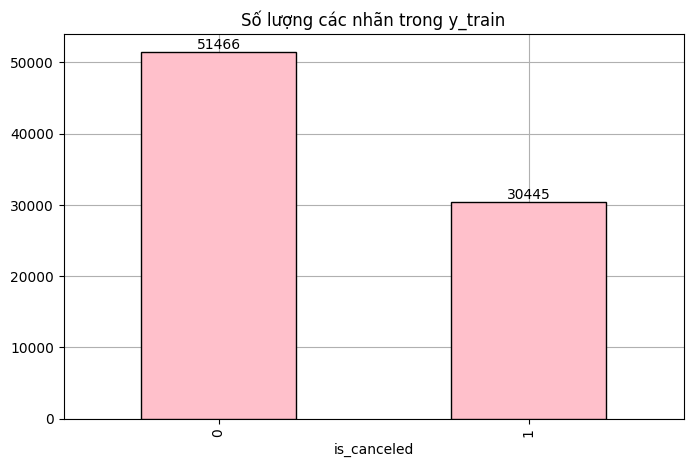

In [ ]:
y_train.value_counts().plot(kind='bar', color='pink', edgecolor='black',figsize=(8,5),zorder=3)
plt.title('Số lượng các nhãn trong y_train')
plt.grid(True,zorder=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

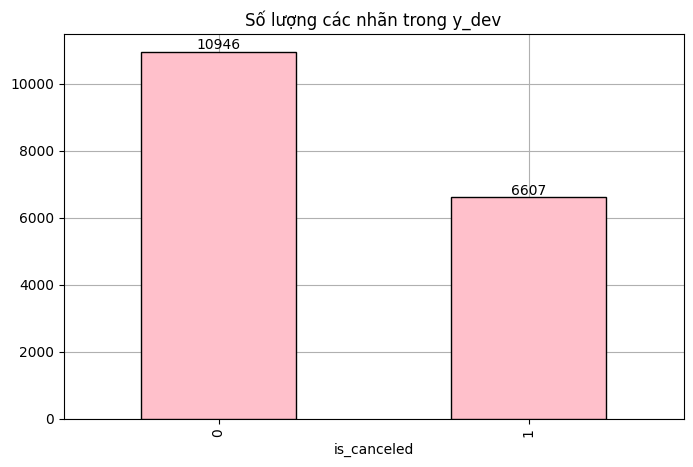

In [ ]:
y_dev.value_counts().plot(kind='bar', color='pink', edgecolor='black',figsize=(8,5),zorder=3)
plt.title('Số lượng các nhãn trong y_dev')
plt.grid(True,zorder=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

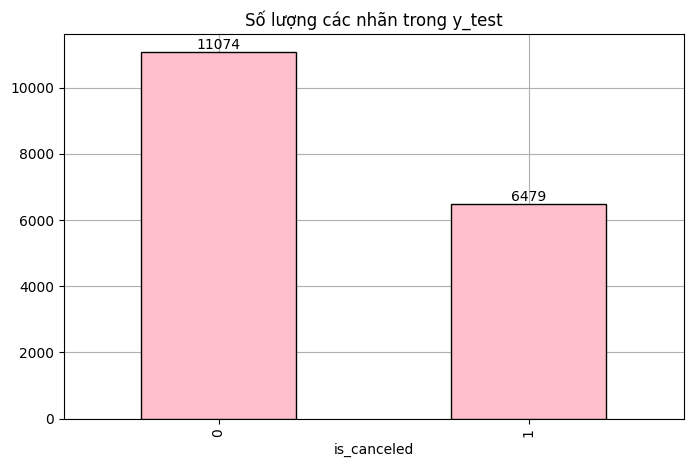

In [ ]:
y_test.value_counts().plot(kind='bar', color='pink', edgecolor='black',figsize=(8,5),zorder=3)
plt.title('Số lượng các nhãn trong y_test')
plt.grid(True,zorder=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

In [ ]:
X_train.to_csv(DATA_PATH + 'X_train.csv', index=False)
X_dev.to_csv(DATA_PATH + 'X_dev.csv', index=False)
X_test.to_csv(DATA_PATH + 'X_test.csv', index=False)

In [ ]:
y_train.to_csv(DATA_PATH + 'y_train.csv', index=False)
y_dev.to_csv(DATA_PATH + 'y_dev.csv', index=False)
y_test.to_csv(DATA_PATH + 'y_test.csv', index=False)

## Biến đổi dữ liệu

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
log_cols = ['lead_time']
ohe_cols = ['market_segment', 'distribution_channel',
            'assigned_room_type', 'customer_type', 'hotel_type',
            'country_group']
ordinal_cols = [
    'previous_cancellations_group',
    'previous_bookings_not_canceled_group',
    'booking_changes_group',
    'days_in_waiting_list_group',
    'deposit_type'
]

ordinal_categories = [
    ['0', '1-5', '>5'],                 # previous_cancellations_group
    ['0', '1-5', '>5'],                 # previous_bookings_not_canceled_group
    ['0', '1-2', '>2'],                 # booking_changes_group
    ['no_wait', 'short', 'medium', 'long', 'very_long'],
    ['No Deposit', 'Refundable', 'Non Refund'] # không đặt cọc, có hoàn tiền , ko hoàn tiền
]

In [ ]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

## Mã hóa dữ liệu

In [ ]:
ohe_transformer = OneHotEncoder(
    drop='first',
    handle_unknown='ignore',
    sparse_output=False
)

In [ ]:
ord_transformer = OrdinalEncoder(
    categories=ordinal_categories,
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

## Pipeline biến đổi & mã hóa dữ liệu

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('log', log_transformer, log_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('ord', ord_transformer, ordinal_cols)
    ],
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocess', preprocess)
])

In [ ]:
X_train_prep = pipeline.fit_transform(X_train)
X_dev_prep   = pipeline.transform(X_dev)
X_test_prep  = pipeline.transform(X_test)

In [ ]:
type(X_train_prep)

numpy.ndarray

In [ ]:
X_train_prep.shape

(81911, 52)

In [ ]:
X_train

,lead_time,market_segment,distribution_channel,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,has_company,has_agent,hotel_type,previous_cancellations_group,previous_bookings_not_canceled_group,booking_changes_group,days_in_waiting_list_group,total_guests,total_stays,is_different_room,country_group
45718,80,Direct,Direct,A,No Deposit,Group,1,0,0,1,City,0,0,0,no_wait,2,3,0,GBR
35357,128,Online TA,TA/TO,A,No Deposit,Transient-Party,0,1,0,1,Resort,0,0,0,no_wait,1,7,0,IRL
79517,12,Groups,TA/TO,A,No Deposit,Transient-Party,0,0,0,1,City,0,0,0,no_wait,2,3,0,PRT
92604,168,Online TA,TA/TO,A,No Deposit,Transient,0,1,0,1,City,0,0,0,no_wait,2,7,0,GBR
17822,292,Offline TA/TO,TA/TO,D,No Deposit,Transient-Party,0,0,0,1,Resort,0,0,1-2,no_wait,1,2,1,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78553,282,Offline TA/TO,TA/TO,A,No Deposit,Transient-Party,0,0,0,1,City,0,0,0,no_wait,2,3,0,SWE
112540,14,Online TA,TA/TO,F,No Deposit,Transient,0,0,0,1,City,0,0,1-2,no_wait,4,2,0,GBR
105869,87,Online TA,TA/TO,F,No Deposit,Transient,0,0,0,1,City,0,0,0,no_wait,4,4,0,GBR
881,327,Offline TA/TO,TA/TO,D,No Deposit,Contract,0,0,0,1,Resort,0,0,0,no_wait,2,14,0,PRT


## Lưu file dữ liệu cho mô hình

In [ ]:
np.save(DATA_PATH + 'X_train_prep.npy', X_train_prep)
np.save(DATA_PATH + 'X_dev_prep.npy', X_dev_prep)
np.save(DATA_PATH + 'X_test_prep.npy', X_test_prep)

np.save(DATA_PATH + 'y_train.npy', y_train)
np.save(DATA_PATH + 'y_dev.npy', y_dev)
np.save(DATA_PATH + 'y_test.npy', y_test)